### Описание проекта

# Исследование данных об играх из интернет-магазина

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

__Описание данных__

 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre` — жанр игры
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score` — оценка критиков (максимум 100)
 - `User_Score` — оценка пользователей (максимум 10)
 - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

pd.set_option('display.max_columns', None)

import warnings
# warnings.simplefilter("ignore")

### Общая информация о данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
def general_info(df: pd.core.frame.DataFrame):
    n = 10
    print(f'Первые {n} строк датасета')
    display(df.head(n))
    print('='*125, '\n')
    print('Общая информация о признаках')
    print()
    display(df.info())
    print('='*125, '\n')
    print('Количество признаков, которые имеют пропущенные значения:', df.isna().any().sum())
    print()
    print('Доля признаков, которые имеют пропущенные значения', round(df.isna().any().sum() / df.shape[1], 2))
    print()
    print('='*125, '\n')
    print('Количество явных дубликатов:', df.duplicated().sum())
    print()
    print('='*125, '\n')
    print('Описательные статистики признаков')
    display(df.describe())
    print('='*125, '\n')
    print('Гистограммы признаков')
    df.hist(bins=20, figsize=(8, 12));

Первые 10 строк датасета


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Общая информация о признаках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


Количество признаков, которые имеют пропущенные значения: 6

Доля признаков, которые имеют пропущенные значения 0.55


Количество явных дубликатов: 0


Описательные статистики признаков


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Гистограммы признаков


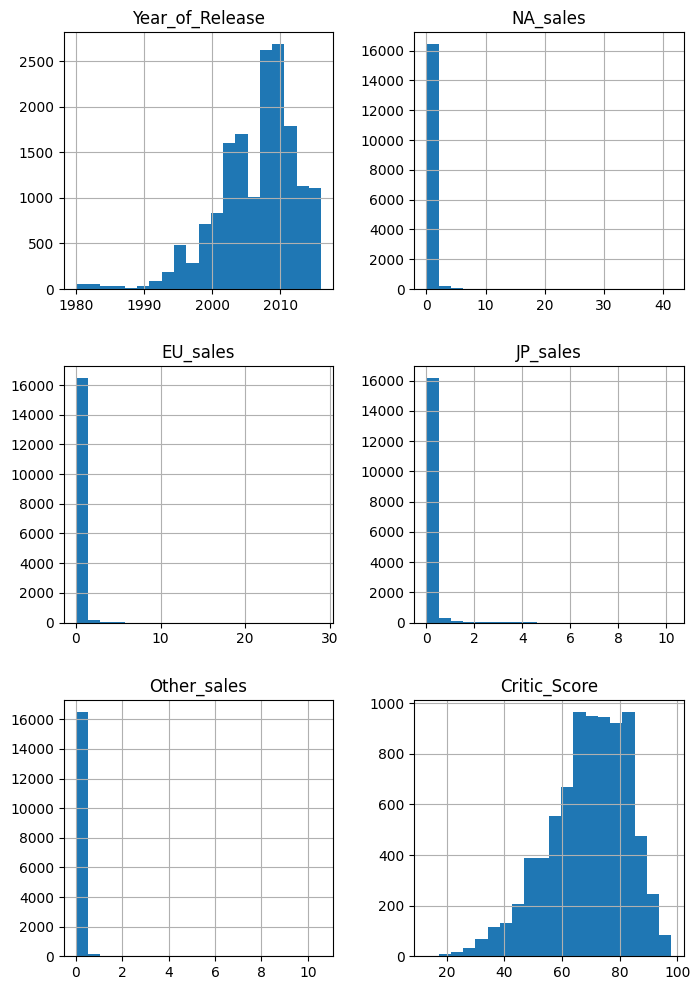

In [4]:
general_info(data)

Общая сводная информация по датасету:
 - датасет содержит 16715 строк и 11 признаков;
 - в 6 признаках есть пропущенные значения;
 - по первоначальной оценке 3 признака имеют несоответствующий тип данных, это признаки `Year_of_Release`, `Critic_Score` и `User_Score`;
 - явных дубликатов нет;
 - признаки содержащие количество продаж имеют много значений близких к нулю.


### Предобработка данных

#### Переименование признаков

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Предобработка признаков

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

##### `name` — название игры

In [9]:
data.name.isna().sum()

2

In [10]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с пропущенным именем, и также пропущены значчения в жанре, оценках критика и ползователяя и в рейтинге. Удаление такого количества таких строк никак не долно сказаться на последующем анализе данных. Поэтому удалим эти строки. 

In [11]:
print('Доля прибыли в процентах от всей прибыли JP региона'
      + '\n    для игр с пропущенным значением в признаке `rating`')
print(round(data[data.rating.isna()].jp_sales.sum() / data.jp_sales.sum() * 100, 1))

Доля прибыли в процентах от всей прибыли JP региона
    для игр с пропущенным значением в признаке `rating`
64.9


In [12]:
print('Доля прибыли в процентах от всей прибыли NA региона'
      + '\n    для игр с пропущенным значением в признаке `rating`')
print(round(data[data.rating.isna()].na_sales.sum() / data.na_sales.sum() * 100, 1))

Доля прибыли в процентах от всей прибыли NA региона
    для игр с пропущенным значением в признаке `rating`
28.2


In [13]:
print('Доля прибыли в процентах от всей прибыли EU региона'
      + '\n    для игр с пропущенным значением в признаке `year_of_release`')
print(round(data[data.rating.isna()].eu_sales.sum() / data.eu_sales.sum() * 100, 1))

Доля прибыли в процентах от всей прибыли EU региона
    для игр с пропущенным значением в признаке `year_of_release`
25.3


Перед удалением для уверенности дополнительно проверим какую долю от всей прибыли по регионам для платформы `GEN` и года релиза 1993 составляет прибыль от игр с пропущенным значением в признаке `name`.

In [14]:
print('Для NA региона')
print()
print('Доля прибыли в процентах от всей прибыли платформы `GEN`'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].na_sales.sum()
    / data[data['platform'] == 'GEN'].na_sales.sum() * 100, 2), '%')
print()

print('Доля прибыли в процентах от всей прибыли за 1993 год'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].na_sales.sum()
    / data[data['year_of_release'] == 1993.0].na_sales.sum() * 100, 2), '%')
print()

Для NA региона

Доля прибыли в процентах от всей прибыли платформы `GEN`
 для игр с пропущенным значением в признаке `name`
8.46 %

Доля прибыли в процентах от всей прибыли за 1993 год
 для игр с пропущенным значением в признаке `name`
10.53 %



In [15]:
print('Для EU региона')
print()
print('Доля прибыли в процентах от всей прибыли платформы `GEN`'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].eu_sales.sum()
    / data[data['platform'] == 'GEN'].eu_sales.sum() * 100, 2), '%')
print()

print('Доля прибыли в процентах от всей прибыли за 1993 год'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].eu_sales.sum()
    / data[data['year_of_release'] == 1993.0].eu_sales.sum() * 100, 2), '%')
print()

Для EU региона

Доля прибыли в процентах от всей прибыли платформы `GEN`
 для игр с пропущенным значением в признаке `name`
8.76 %

Доля прибыли в процентах от всей прибыли за 1993 год
 для игр с пропущенным значением в признаке `name`
10.23 %



In [16]:
print('Для JP региона')
print()
print('Доля прибыли в процентах от всей прибыли платформы `GEN`'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].jp_sales.sum()
    / data[data['platform'] == 'GEN'].jp_sales.sum() * 100, 2), '%')
print()

print('Доля прибыли в процентах от всей прибыли за 1993 год'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].jp_sales.sum()
    / data[data['year_of_release'] == 1993.0].jp_sales.sum() * 100, 2), '%')
print()

Для JP региона

Доля прибыли в процентах от всей прибыли платформы `GEN`
 для игр с пропущенным значением в признаке `name`
1.11 %

Доля прибыли в процентах от всей прибыли за 1993 год
 для игр с пропущенным значением в признаке `name`
0.12 %



In [17]:
print('Для остальных регионов')
print()
print('Доля прибыли в процентах от всей прибыли платформы `GEN`'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].other_sales.sum()
    / data[data['platform'] == 'GEN'].other_sales.sum() * 100, 2), '%')
print()

print('Доля прибыли в процентах от всей прибыли за 1993 год'
      + '\n для игр с пропущенным значением в признаке `name`')
print(round(
    data[data.name.isna()].other_sales.sum()
    / data[data['year_of_release'] == 1993.0].other_sales.sum() * 100, 2), '%')

Для остальных регионов

Доля прибыли в процентах от всей прибыли платформы `GEN`
 для игр с пропущенным значением в признаке `name`
8.25 %

Доля прибыли в процентах от всей прибыли за 1993 год
 для игр с пропущенным значением в признаке `name`
8.25 %


Видим, что для игр с пропусками в `name` прибыль составляет около 10% от суммарной прибыли для платформы `GEN` или за 1993 год по NA, EU и остальным регионам, и не более 1.11% для региона JP.

10 процентов это заметная доля от прибыли. Логичным решением будут всё же оставить такие данные в датасете. Это с одной стороны.<br>
С другой стороны, эти данные за 1993 год, и для анализа факторов успешности игр на текущий момент (в датасете это конец 2016 года) эти данные, логично предположить, уже не релевантны.

Всё же оставим эти строки в датасете. Как минимум, если они и не пригодятся для следующего анализа, то и исследование не сломают.

In [18]:
data.name.isna().sum()

2

__Причины пропусков:__
 - можно предположить, что пропуски в `name` связаны с ошибкой ввода информации, или хранения, или выгрузки данных из БД. Другими словами это технологическая ошибка. Менее вероятно, что это человеческий фактор, то есть, что тот кто вводил эту информацию в систему (в базу данных), увидев впропуски не уточнил бы эту информацию. Но это только предположение.

##### `year_of_release` — год выпуска

In [19]:
data.year_of_release.isna().sum()

269

In [20]:
print('Процент данных с пропущенным значением в признаке `year_of_release`:',
      round(data.year_of_release.isna().sum() / data.shape[0], 3) * 100)

Процент данных с пропущенным значением в признаке `year_of_release`: 1.6


Предположим, что наиболее логичным было бы попробовать восстановить пропуски в этом признаке на основе данных в признаке `platform` или `genre`. На основе других признаков это практически невозможно. Есть вероятность, что пропуски связаны с особенностью сбора информации по какой-то определённой платформе или жанру. 

Можно предположить, что пропуски в `year_of_release` могут относиться к определённой платформе или определённому жанру.
Проверим эту гипотезу по распределению платформ и жанров для игр с пропущеннвм годом релиза.

In [21]:
data[data.year_of_release.isna()].platform.value_counts()

Wii     34
PS2     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [22]:
data[data.year_of_release.isna()].genre.value_counts()

Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Platform        10
Adventure       10
Strategy        10
Name: genre, dtype: int64

Видно, что для строк с пропусками в `year_of_release` признаки `platform` и `genre` принимают разнообразные значения. Гипотеза о том, что пропуски связаны с определённой платформой или жанром не продтверждается. То есть на основе признаков `platform` и `genre` восстановить пропуски в `year_of_release` не получится.

In [23]:
data[data.year_of_release.isna()].isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score          94
rating              88
dtype: int64

Пропуски в `year_of_release` составляяют  1.6 процента от всего датасета. А также есть совместные пропуски в признаках `critic_score`, `user_score` и `rating`.

In [24]:
data[data.year_of_release.isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [25]:
print('Доля прибыли в процентах от всей прибыли NA региона'
      + '\n    для игр с пропущенным значением в признаке `year_of_release`')
print(round(
    data[data.year_of_release.isna()].na_sales.sum()
    / data.na_sales.sum() * 100, 1), '%')
print()

Доля прибыли в процентах от всей прибыли NA региона
    для игр с пропущенным значением в признаке `year_of_release`
1.3 %



In [26]:
print('Доля прибыли в процентах от всей прибыли EU региона'
      + '\n    для игр с пропущенным значением в признаке `year_of_release`')
print(round(
    data[data.year_of_release.isna()].eu_sales.sum()
    / data.eu_sales.sum() * 100, 1), '%')
print()

Доля прибыли в процентах от всей прибыли EU региона
    для игр с пропущенным значением в признаке `year_of_release`
1.0 %



In [27]:
print('Доля прибыли в процентах от всей прибыли JP региона'
      + '\n    для игр с пропущенным значением в признаке `year_of_release`')
print(round(
    data[data.year_of_release.isna()].jp_sales.sum()
    / data.jp_sales.sum() * 100, 1), '%')
print()

Доля прибыли в процентах от всей прибыли JP региона
    для игр с пропущенным значением в признаке `year_of_release`
0.5 %



In [28]:
print('Доля прибыли в процентах от всей прибыли остальных региона'
      + '\n    для игр с пропущенным значением в признаке `year_of_release`')
print(round(
    data[data.year_of_release.isna()].other_sales.sum()
    / data.other_sales.sum() * 100, 1), '%')
print()

Доля прибыли в процентах от всей прибыли остальных региона
    для игр с пропущенным значением в признаке `year_of_release`
1.1 %



Видно, что во всех регионах доля суммарной прибыли в строках с пропущенным годом релиза составляет не более 1.3 % от суммарной прибыли по каждому региону.

Дополнительно посмотрим распределение долей продаж по жанрам и платформам

In [29]:
year_of_release_nan_by_genre = (
    data[data.year_of_release.isna()]
    .groupby('genre')
    [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .agg('sum')
)
data_by_genre = (
    data
    .groupby('genre')
    [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .agg('sum')
)

In [30]:
sales_percents_by_genre = pd.DataFrame(index=year_of_release_nan_by_genre.index)

In [31]:
def add_percents_for_genres_by_region(region):
    global year_of_release_nan_by_genre
    global data_by_genre
    global sales_percents_by_genre
    year_of_release_nan_by_genre[region + '_sales_str'] = \
        round(year_of_release_nan_by_genre[region + '_sales'], 2)
    year_of_release_nan_by_genre[region + '_sales_str'] = \
        year_of_release_nan_by_genre[region + '_sales_str'].astype(str)

    data_by_genre[region + '_sales_str'] = round(data_by_genre[region + '_sales'], 2)
    data_by_genre[region + '_sales_str'] = data_by_genre[region + '_sales_str'].astype(str)
 
    sales_percents_by_genre[region + '_sales: nans in YoR / all'] = \
        year_of_release_nan_by_genre[region + '_sales_str'] + ' / ' + data_by_genre[region + '_sales_str']
    
    year_of_release_nan_by_genre[region + '_in_percents'] = (
        round((year_of_release_nan_by_genre[region + '_sales']
               / data_by_genre[region + '_sales'] * 100), 1)
    )
    year_of_release_nan_by_genre[region + '_in_percents'] = \
        year_of_release_nan_by_genre[region + '_in_percents'].astype(str)
    
    sales_percents_by_genre[region + '_sales: nans in YoR / all'] = (
        sales_percents_by_genre[region + '_sales: nans in YoR / all'] + ' = ' 
        + year_of_release_nan_by_genre[region + '_in_percents'] + ' %'
    )

In [32]:
add_percents_for_genres_by_region('na')
add_percents_for_genres_by_region('eu')
add_percents_for_genres_by_region('jp')
add_percents_for_genres_by_region('other')

In [33]:
sales_percents_by_genre

,na_sales: nans in YoR / all,eu_sales: nans in YoR / all,jp_sales: nans in YoR / all,other_sales: nans in YoR / all
genre,,,,
Action,15.84 / 879.01 = 1.8 %,8.14 / 519.13 = 1.6 %,1.29 / 161.43 = 0.8 %,2.38 / 184.6 = 1.3 %
Adventure,3.74 / 105.26 = 3.6 %,0.34 / 63.54 = 0.5 %,0.06 / 52.3 = 0.1 %,0.12 / 16.49 = 0.7 %
Fighting,2.85 / 223.36 = 1.3 %,1.33 / 100.33 = 1.3 %,0.2 / 87.48 = 0.2 %,0.49 / 36.36 = 1.3 %
Misc,7.7 / 407.27 = 1.9 %,2.14 / 212.74 = 1.0 %,1.09 / 108.11 = 1.0 %,1.29 / 74.39 = 1.7 %
Platform,1.06 / 445.5 = 0.2 %,0.96 / 200.35 = 0.5 %,0.12 / 130.83 = 0.1 %,0.08 / 51.09 = 0.2 %
Puzzle,1.74 / 122.87 = 1.4 %,0.23 / 50.01 = 0.5 %,0.63 / 57.31 = 1.1 %,0.08 / 12.38 = 0.6 %
Racing,2.49 / 359.35 = 0.7 %,2.02 / 236.51 = 0.9 %,0.08 / 56.71 = 0.1 %,0.59 / 76.1 = 0.8 %
Role-Playing,0.77 / 330.81 = 0.2 %,0.47 / 188.71 = 0.2 %,2.02 / 355.41 = 0.6 %,0.22 / 59.63 = 0.4 %
Shooter,7.41 / 592.24 = 1.3 %,2.82 / 317.34 = 0.9 %,0.08 / 38.76 = 0.2 %,0.78 / 104.11 = 0.7 %


Из таблицы видно, что прибыль по строкам с пропущенным годом релиза распределена в среднем равномерно по всем категориям и регионам и составляет не более 2 % для каждого жанра и региона. Немного выделяется только жанр `Adventure` для региона `NA`, в нём доля составляет 3.6 %.

Теперь посмотрим на распределение по платформам.

In [34]:
year_of_release_nan_by_platform = (
    data[data.year_of_release.isna()]
    .groupby('platform')
    [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .agg('sum')
)
data_by_platform = (
    data
    .groupby('platform')
    [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .agg('sum')
)

In [35]:
sales_percents_by_platform = pd.DataFrame(index=year_of_release_nan_by_platform.index)

In [36]:
def add_percents_for_platforms_by_region(region):
    global year_of_release_nan_by_platform
    global data_by_platform
    global sales_percents_by_platform
    year_of_release_nan_by_platform[region + '_sales_str'] = \
        round(year_of_release_nan_by_platform[region + '_sales'], 2)
    year_of_release_nan_by_platform[region + '_sales_str'] = \
        year_of_release_nan_by_platform[region + '_sales_str'].astype(str)

    data_by_platform[region + '_sales_str'] = round(data_by_platform[region + '_sales'], 2)
    data_by_platform[region + '_sales_str'] = data_by_platform[region + '_sales_str'].astype(str)
 
    sales_percents_by_platform[region + '_sales: nans in YoR / all'] = \
        year_of_release_nan_by_platform[region + '_sales_str'] + ' / ' + data_by_platform[region + '_sales_str']
    
    year_of_release_nan_by_platform[region + '_in_percents'] = (
        round((year_of_release_nan_by_platform[region + '_sales']
               / data_by_platform[region + '_sales'] * 100), 1)
    )
    year_of_release_nan_by_platform[region + '_in_percents'] = \
        year_of_release_nan_by_platform[region + '_in_percents'].astype(str)
    
    sales_percents_by_platform[region + '_sales: nans in YoR / all'] = (
        sales_percents_by_platform[region + '_sales: nans in YoR / all'] + ' = ' 
        + year_of_release_nan_by_platform[region + '_in_percents'] + ' %'
    )

In [37]:
add_percents_for_platforms_by_region('na')
add_percents_for_platforms_by_region('eu')
add_percents_for_platforms_by_region('jp')
add_percents_for_platforms_by_region('other')

In [38]:
sales_percents_by_platform

,na_sales: nans in YoR / all,eu_sales: nans in YoR / all,jp_sales: nans in YoR / all,other_sales: nans in YoR / all
platform,,,,
2600,9.82 / 90.6 = 10.8 %,0.61 / 5.47 = 11.2 %,0.0 / 0.0 = nan %,0.07 / 0.91 = 7.7 %
3DS,0.84 / 83.49 = 1.0 %,0.21 / 61.48 = 0.3 %,0.05 / 100.67 = 0.0 %,0.09 / 13.36 = 0.7 %
DS,2.09 / 382.4 = 0.5 %,0.48 / 188.89 = 0.3 %,0.55 / 175.57 = 0.3 %,0.22 / 59.26 = 0.4 %
GB,0.68 / 114.32 = 0.6 %,0.31 / 47.82 = 0.6 %,0.0 / 85.12 = 0.0 %,0.04 / 8.2 = 0.5 %
GBA,3.42 / 187.54 = 1.8 %,0.66 / 75.25 = 0.9 %,0.77 / 47.33 = 1.6 %,0.12 / 7.73 = 1.6 %
GC,1.52 / 133.46 = 1.1 %,0.39 / 38.71 = 1.0 %,0.24 / 21.58 = 1.1 %,0.05 / 5.18 = 1.0 %
N64,0.11 / 139.02 = 0.1 %,0.03 / 41.06 = 0.1 %,0.46 / 34.22 = 1.3 %,0.07 / 4.38 = 1.6 %
PC,1.19 / 94.53 = 1.3 %,2.07 / 142.44 = 1.5 %,0.0 / 0.17 = 0.0 %,0.5 / 22.38 = 2.2 %
PS,1.8 / 336.52 = 0.5 %,1.22 / 213.61 = 0.6 %,0.04 / 139.82 = 0.0 %,0.22 / 40.91 = 0.5 %


Из таблицы видно, что и для платформ доля прибыли для строк с пропущенным годом релиза распределена в среднем равномерно и составляет не более 3 % по каждому регионау, за исключение платформы `2600`, для которой прибыль для строк с `year_of_release = nan` по регионам `NA`, `EU` и `other` составляет почти 10.8 %, 11.2 % и 7.7 % соответственно. По существующим данным эта платформа была активна в 80-е годы. Вероятнее всего на текущий момент (по датасету декабрь 2016) данная платформа уже не используется.

In [39]:
data[data.platform == '2600'].year_of_release.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989.,   nan])

Из вышепроведённого анализа можно сделать вывод:
 - доля прибыли от строк-игра спропущенным годом релиза распределена в среднем равномерно по всем регионам, платформам, жанрам, на оснвоании чего можно сказать, что удаление таких строк из датасета не приведёт к искажению общей картины распределения прибыли по регионам, платформам, жанрам.

In [40]:
data = data.dropna(subset=['year_of_release'])

In [41]:
data.year_of_release.isna().sum()

0

Теперь можно преобразовать тип данных признака `year_of_release` к `int`

In [42]:
data.year_of_release = data.year_of_release.astype(int)

__Причины пропусков:__
 - причины пропусков в этом признаке предположить сложно. Как видно из анализа пропуске не отностся к какой-либо группе либо платформе либо по жанру. При этом прибль от строк с пропусками распределна в среднем равномерно по всем регионам. Причины пропусков можно сформулировать только в общем виде: либо технологическая ошибка, либо человеческий фактор.

##### `genre` — жанр игры

2 пропуска в этом признаке совпадают с пропусками в признаке `name`

##### `critic_score` — оценка критиков

In [43]:
data.critic_score.isna().sum()

8463

In [44]:
data.critic_score.value_counts(1, dropna=False).head()

NaN     0.514593
70.0    0.015323
71.0    0.015080
75.0    0.014593
80.0    0.014289
Name: critic_score, dtype: float64

В признаке `critic_score` 51% пропущенных значений.

Это критически много. Но попробуем их заполнить медианным значеним на основе группировки по признакам `platform` и `genre` вместе и по-отдельности.

Сначала посмотрим количество игр в группах при группировке сразу по `platform` и `genre`

In [45]:
data.pivot_table(index='platform', columns='genre', values='critic_score', aggfunc='count')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3DO,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3DS,58.0,10.0,7.0,10.0,18.0,10.0,5.0,26.0,2.0,10.0,7.0,3.0
DC,0.0,2.0,2.0,NaN,1.0,NaN,2.0,4.0,1.0,1.0,1.0,NaN
DS,135.0,58.0,15.0,62.0,54.0,100.0,29.0,97.0,32.0,54.0,40.0,32.0
GB,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GBA,102.0,13.0,16.0,27.0,78.0,21.0,42.0,36.0,28.0,9.0,50.0,8.0
GC,85.0,14.0,27.0,23.0,59.0,10.0,46.0,23.0,42.0,10.0,90.0,8.0
GEN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0


Видно, что очень много групп с количеством или`NaN` или `0.0` или `1.0`. Это значит, что замена пропусков на осноке группировки сразу сразу по `platform` и `genre` будет не эффективным.

Проверим при группировке по `platform`

In [46]:
print('Всего групп по платформам с непустыми значениями в "critic_score":',
    len(data.pivot_table(index='platform', values='critic_score', aggfunc='median')))

Всего групп по платформам с непустыми значениями в "critic_score": 17


In [47]:
print('Общее число платформ:', data.platform.nunique())

Общее число платформ: 31


Видно, что при группировке по `platform` также недостаточно данных. Замена будет неэффективной.

Теперь проверим при группировке по `genre`

In [48]:
print('Всего групп по жанрам с непустыми значениями в "critic_score":',
    len(data.pivot_table(index='genre', values='critic_score', aggfunc='median')))

Всего групп по жанрам с непустыми значениями в "critic_score": 12


In [49]:
print('Общее число жанров:', data.genre.nunique())

Общее число жанров: 12


При группировке по `genre` данных достаточно. Поэтому заменим пропуски медианными значениями по жанру. Но сделаем это в отдельном признаке. Далее при исследовании для сравнения испольуем оба признака.

In [50]:
data['critic_score_v2'] = data.critic_score
data.critic_score_v2 = (
    data['critic_score']
    .fillna(
        data.groupby(by=['genre'])['critic_score']
        .transform('median')
    )
)

In [51]:
data.critic_score_v2.isna().sum()

2

In [52]:
data[data.critic_score_v2.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_v2
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN


Осталось два пропуска, для которых поле `genre` пустое.

##### `user_score` — оценка пользователей

In [53]:
data.user_score.isna().sum()

6607

In [54]:
data.user_score.value_counts(1, dropna=False).head()

NaN    0.401739
tbd    0.144473
7.8    0.019579
8      0.017329
8.2    0.016782
Name: user_score, dtype: float64

Признак `user_score` имеет 40% пропусков, плюс 14% строковое значение `tbd`. Прелположительно это аббревиатура для `to be done`, что значит *должно быть сделано* или, другими словами, можно интерпретировать *будет добавлено*.

Проверим, не соответствует ли значение `tbd` какому-то определённому году релиза или платформе или жанру или рейтингу.

In [55]:
data[data.user_score == 'tbd'].year_of_release.value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

In [56]:
data[data.user_score == 'tbd'].platform.value_counts()

DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3      87
X360     83
3DS      54
PC       49
PS       44
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64

In [57]:
data[data.user_score == 'tbd'].genre.value_counts()

Misc            440
Sports          406
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform        135
Shooter          95
Strategy         39
Fighting         37
Role-Playing     30
Name: genre, dtype: int64

In [58]:
data[data.user_score == 'tbd'].rating.value_counts()

E       1548
T        369
E10+     360
M         42
EC         7
Name: rating, dtype: int64

Видно, что значение `tbd` признака `user_score` распределено по разным значениям признаков `year_of_release`, `platform`, `genre`, `rating`. Отнести такие строки к определенной группе по значению одного из заполненных признаков невозможно, как и заменить значение `tbd` на реальную оценку невозможно. Чтобы далее было проще работать со значениями признака `user_score`, заменим `tbd` на `NaN`.

In [59]:
data.user_score.where(data.user_score != 'tbd', float("Nan"), inplace=True);

In [60]:
data.user_score.value_counts(1, dropna=False).head()

NaN    0.546212
7.8    0.019579
8      0.017329
8.2    0.016782
8.3    0.015323
Name: user_score, dtype: float64

Теперь можно преобразовать тип данных признака `user_score` к `float`

In [61]:
data.user_score = data.user_score.astype(float)

In [62]:
data.user_score.dtype

dtype('float64')

Далее попробуем заполнить пропуски по такому же принципу как сделали для признака `critic_score`: проверим можно ли заполнить медианным значением на основе группировки по признакам `platform` и `genre` вместе или по-отдельности.

In [63]:
data.pivot_table(index='platform', columns='genre', values='user_score', aggfunc='count')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3DO,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3DS,63.0,9.0,7.0,11.0,18.0,8.0,5.0,26.0,3.0,11.0,6.0,4.0
DC,0.0,2.0,2.0,NaN,1.0,NaN,2.0,4.0,1.0,1.0,1.0,NaN
DS,88.0,41.0,14.0,43.0,36.0,54.0,19.0,89.0,27.0,47.0,25.0,29.0
GB,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GBA,55.0,9.0,13.0,13.0,50.0,6.0,25.0,32.0,13.0,9.0,19.0,7.0
GC,72.0,13.0,24.0,17.0,45.0,6.0,32.0,22.0,40.0,10.0,68.0,8.0
GEN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0


Так же много групп с количеством или`NaN` или `0.0` или `1.0`. Замена пропусков на осноке группировки по `platform` и `genre` будет не эффективным.

Пробуем по-отдельности по `platform` или по `genre`

In [64]:
print('Всего групп по платформам с непустыми значениями в "user_score":',
    len(data.pivot_table(index='platform', values='user_score', aggfunc='median')))

Всего групп по платформам с непустыми значениями в "user_score": 17


In [65]:
print('Общее число платформ:', data.platform.nunique())

Общее число платформ: 31


In [66]:
print('Всего групп по жанрам с непустыми значениями в "user_score":',
    len(data.pivot_table(index='genre', values='user_score', aggfunc='median')))

Всего групп по жанрам с непустыми значениями в "user_score": 12


In [67]:
print('Общее число жанров:', data.genre.nunique())

Общее число жанров: 12


В итоге делаем так же как и для признака `critic_score`: заменяем медианным значением по жанрам, и записиываем это в новый столбец `user_score_v2`.

In [68]:
data['user_score_v2'] = data.user_score
data.user_score_v2 = (
    data['user_score']
    .fillna(
        data.groupby(by=['genre'])['user_score']
        .transform('median')
    )
)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  critic_score_v2  16444 non-null  float64
 12  user_score_v2    16444 non-null  float64
dtypes: float64(8), int32(1), object(4)
memory usage: 1.7+ MB


##### `rating` — рейтинг от организации ESRB

In [70]:
data.rating.isna().sum()

6678

In [71]:
data.rating.value_counts(1, dropna=False)

NaN     0.406056
E       0.238417
T       0.176639
M       0.093397
E10+    0.084701
EC      0.000486
K-A     0.000182
RP      0.000061
AO      0.000061
Name: rating, dtype: float64

В признаке `rating` так же много пропусков - почти 41%.

Проверим как эти пропуски распределены по значениям других признаков.

In [72]:
data[data.rating.isna()].year_of_release.value_counts().sort_index()

1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     41
1993     62
1994    120
1995    219
1996    256
1997    270
1998    347
1999    296
2000    202
2001    143
2002    174
2003    162
2004    164
2005    233
2006    328
2007    376
2008    446
2009    415
2010    456
2011    433
2012    298
2013    228
2014    236
2015    291
2016    222
Name: year_of_release, dtype: int64

In [73]:
data[data.rating.isna()].platform.value_counts()

PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

In [74]:
data[data.rating.isna()].genre.value_counts()

Action          1161
Misc             859
Adventure        853
Sports           828
Role-Playing     711
Fighting         405
Racing           370
Strategy         341
Platform         317
Shooter          300
Simulation       298
Puzzle           233
Name: genre, dtype: int64

Видно, что пропуски распределено по разным значениям признаков `year_of_release`, `platform`, `genre`. Таким образом, отнести строки с пропусками в `rating` к определенной группе по значению одного из заполненных признаков невозможно.

In [75]:
data[data.rating.isna()].isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6597
user_score         6595
rating             6678
critic_score_v2       2
user_score_v2         2
dtype: int64

Так же видно, что пропуски в признаках `critic_score`, `user_score`, `rating` пересекаются.

На данном шаге исследования оставим признак `rating` без изменений

#### Проверка на неявные дубликаты

Проверим дубликаты по признакам `name` и `plafrom`.

In [76]:
data.duplicated(subset=['name', 'platform']).sum()

4

In [77]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_v2,user_score_v2
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,83.0,5.5
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,83.0,8.5
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,83.0,8.5
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,82.0,8.5
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,82.0,8.5
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,83.0,5.5


Выводы по таблице:
 - Madden NFL 13 - PS3: у этих строк совпадает и год выпуска: в общем случае такие дубликаты нужно удалять, обновляя при этом важные дляя анализа признакки - в данном случае сложить значени признака `eu_sales` у дубликатов. Но в данном конкртеном случае это одна единственная запись, на статистику по количесву игр она практически не повлияет, а в сумме прода в любом случае будет учтена;
 - NaN - GEN: не можем утверждать что это дубликаты из-за отсутствия навзание игры
 - Need for Speed: Most Wanted - X360, PC: это не дубликаты, игры различаются годом выпуска 2005, и ремейк 2012 года: в целом правильно было бы сделать пометку  о годе выпуска в названии игр, но так как исследований свзанных с названием игр в проекте не предусмотрено, то оставлем в таком виде.

#### Добавление новых признаков

Добавим новый признак с сумой продаж по всем регионам

In [78]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [79]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_v2,user_score_v2,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,69.5,7.7,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,74.0,7.8,31.38


#### Сводная информация по результатм предобработки данных

 - все признаки переименованы: приведены к нижнему `snake_case`;
 - преобработка признаков:
    - в признаке `name` 2 пропуска, оставлены без изменений;
    - в признаке `year_of_release` удалено 269 пропусков, тип данных признака заменён на `int`;
    - 2 пропуска в признаке `genre` совапдают с пропуска в признаке `name`, оставлены без изменений;
    - в признаке `critic_score` 51% пропущенных значений. Изначальный признак `critic_score` оставлен без изменений, добавлен новый признак `critic_score_v2` с заменой пропусков медианным значение по жанру для дальнейшего анализа эффективности такой замены;
    - в признаке `user_score` в сумме 55% пропусков или несоответствующих  значение `tbd`. Они также заменены медианным начением по жанру с продублированном новом признаке `user_score_v2`;
    - в признаке `rating` не менее 40%. Признак оставлен без изменений;
 - добавлен новый принак `total_sales`, содержащий суммарные продажи по всем регионам.

### Исследовательский анализ данных

#### Распределение количества игр по годам

In [80]:
games_per_month = (
    data.groupby('year_of_release')
    .agg(games_count=('name', 'count'))
)

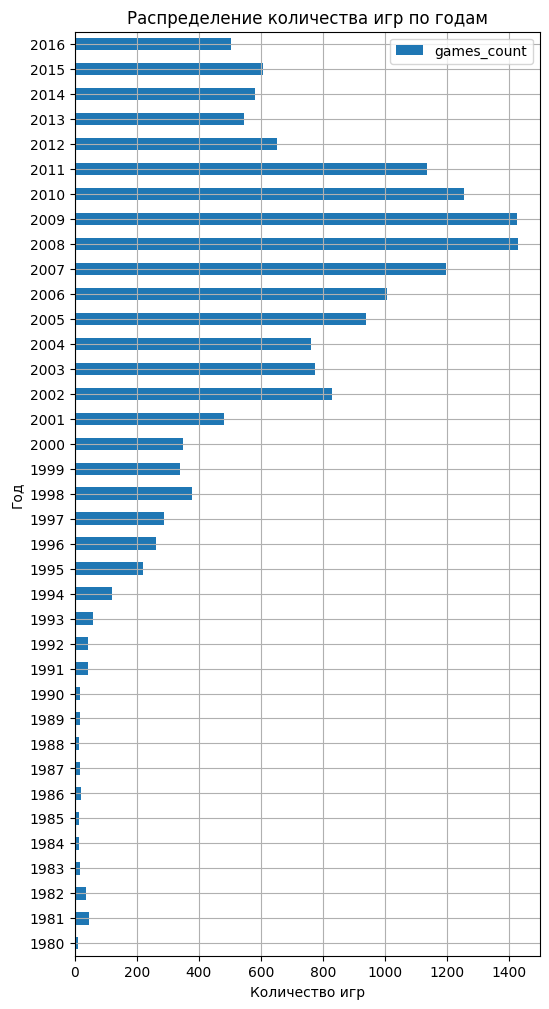

In [81]:
ax = games_per_month.plot(
    kind='barh',
    grid=True,
#     figsize=(4, 8), before review
    figsize=(6, 12), # after review
);
ax.set_title('Распределение количества игр по годам')
ax.set(xlabel='Количество игр', ylabel='Год');

In [82]:
games_per_month.games_count.sort_values().unique()[-2:]

array([1426, 1427], dtype=int64)

Из распределения видно, что:
 - пик по количеству выпущенных игр приходитс на 2008, 2009 годы - это чуть более 1400 игр в год;
 - до 2008 года наблюдается относительно равномерный рос, начиная с 1991, с небольшими локальными спадами в 1999, 2000 и 2003, 2004 годах;
 - после 2009 года наблюдается спад количества выпущенных игр, с резким падением почти в 2 раза в 2012 году.
 
Рост до 2008 можно связать с бурным развитием компьютерных технологий в этот период как software так и hardware. А резкий спад после 2008-2009 годов - с мировым финансовым кризисом в эти годы.
 
В зависимость от целей исследования важны данные за разные периоды. Так, например, можно предположить, что для построения прогноза на будущие годы будут важнее более актуальные данные, например, за последний10-летний или 20-летний период. Данные же за период, например, ранее 2000 года будут менее важны, потому что те технологии, на которых разрабатывались такие игры, уже устарели и почти не используются.

#### Продажи по платформам

In [83]:
total_sales_by_platform = (
    data.groupby('platform')
    .agg(platform_total_sales=('total_sales', 'sum'))
)
total_sales_by_platform = total_sales_by_platform.sort_values('platform_total_sales', ascending=False)
total_sales_by_platform.head(10)

,platform_total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


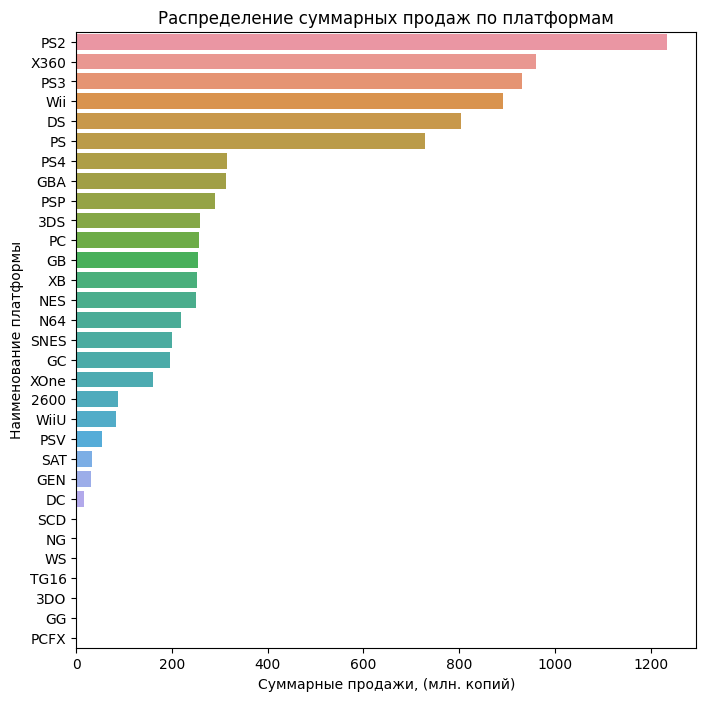

In [84]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    x='platform_total_sales',
    y=total_sales_by_platform.index,
    data=total_sales_by_platform,
)

ax.set_title('Распределение суммарных продаж по платформам')
ax.set(xlabel='Суммарные продажи, (млн. копий)', ylabel='Наименование платформы');

In [85]:
number_of_most_profitable_platforms = 6

In [86]:
most_profitable_platform_names = (
    total_sales_by_platform.nlargest(
        number_of_most_profitable_platforms,
        'platform_total_sales')
    .index
)
print(f'{number_of_most_profitable_platforms} платформ с наибольшими суммарными продажами за весь период:')
print(', '.join(most_profitable_platform_names))

6 платформ с наибольшими суммарными продажами за весь период:
PS2, X360, PS3, Wii, DS, PS


Посмотрим для них распределение продаж по годам.

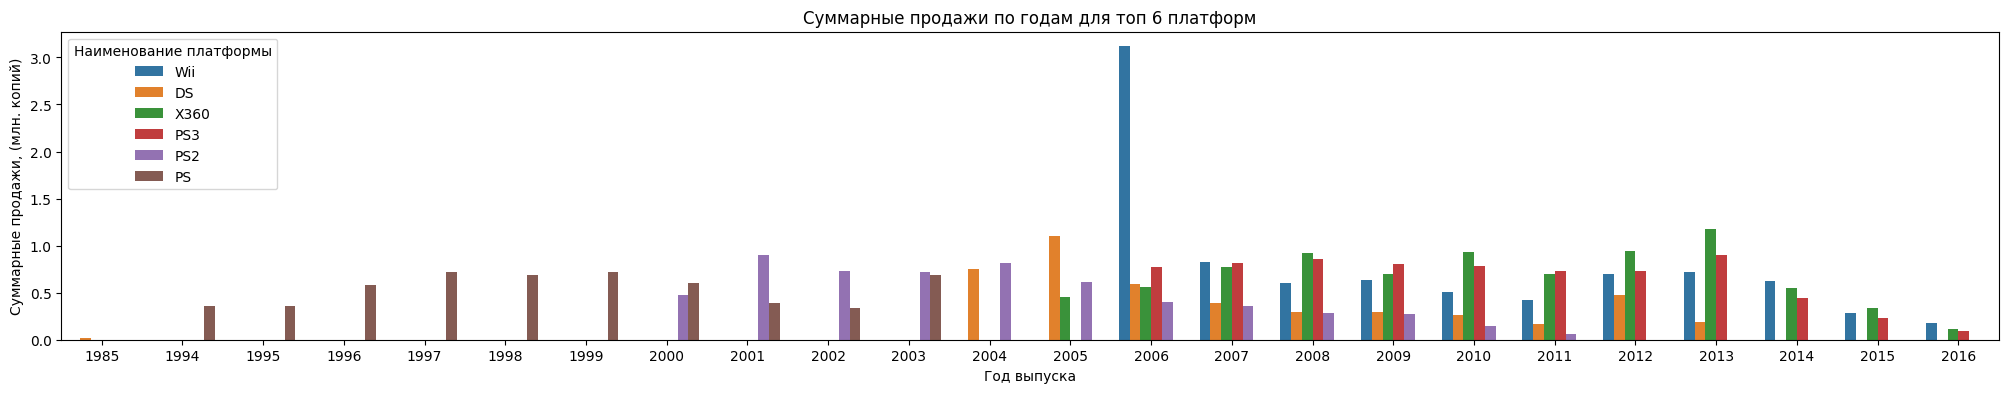

In [87]:
most_profitable_platform = data.query('platform in @most_profitable_platform_names')

plt.figure(figsize=(25, 4))
ax = sns.barplot(
    x='year_of_release',
    y='total_sales',
    hue="platform",
    data=most_profitable_platform,
    ci=None
)

ax.set_title(f'Суммарные продажи по годам для топ {number_of_most_profitable_platforms} платформ')
ax.set(xlabel='Год выпуска', ylabel='Суммарные продажи, (млн. копий)')
ax.legend(title='Наименование платформы', loc='upper left');

По графику видно, что:
 - периоды наибольших продаж (периоды активности) для разных платформ приходятся на разные годы;
 - также можно отметить, что за последние четыре года (2013, 2014, 2015, 2016) наиболее активны по продажам платформы `Wii`, `X350`, `PS3`;
 - для платформы `DS` можно отметить основной период активности с 2004 по 2013 годы, при этом были небольшие продажи в 1985 году.

In [88]:
data[(data.platform == 'DS') & (data.year_of_release == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_v2,user_score_v2,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,68.0,7.4,0.02


Посчитаем медианное значение для периода активности платформ.

In [89]:
profitable_platform_number = number_of_most_profitable_platforms

In [90]:
profitable_platform_names = (
    total_sales_by_platform
    .nlargest(profitable_platform_number, 'platform_total_sales')
    .index
)

profitable_platform = data.query('platform in @profitable_platform_names')

profitable_platform_grouped = (
    profitable_platform.groupby('platform')
    .agg({'year_of_release': 'describe'})
)

profitable_platform_grouped[('year_of_release', 'max-min')] = (
    profitable_platform_grouped[('year_of_release', 'max')]
    - profitable_platform_grouped[('year_of_release', 'min')]
)
profitable_platform_grouped

year_of_release                                                 \
                   count         mean       std     min     25%     50%   
platform                                                                  
DS                2121.0  2008.185290  1.778565  1985.0  2007.0  2008.0   
PS                1190.0  1998.005882  1.848091  1994.0  1997.0  1998.0   
PS2               2127.0  2004.583921  2.567689  2000.0  2002.0  2005.0   
PS3               1306.0  2010.840735  2.459616  2006.0  2009.0  2011.0   
Wii               1286.0  2008.966563  1.542034  2006.0  2008.0  2009.0   
X360              1232.0  2009.880682  2.458339  2005.0  2008.0  2010.0   

                                  
             75%     max max-min  
platform                          
DS        2009.0  2013.0    28.0  
PS        1999.0  2003.0     9.0  
PS2       2007.0  2011.0    11.0  
PS3       2013.0  2016.0    10.0  
Wii       2010.0  2016.0    10.0  
X360      2011.0  2016.0    11.0

In [91]:
actual_period_in_years = int(profitable_platform_grouped[('year_of_release', 'max-min')].median())
actual_period_in_years

10

Средний период активности платформ составляет 10 лет. Можно сказать, что в среднем за период 10 лет старые платформы исчезают, и повляются новые.

#### Подготовка среза данных за актуальный период

In [92]:
actual_period_in_years = 3

In [93]:
actual_period_start = data.year_of_release.sort_values().unique()[-1] - actual_period_in_years + 1
actual_period_start

2014

In [94]:
actual_data = data.query('year_of_release >= @actual_period_start')

In [95]:
actual_data.shape

(1689, 14)

#### Определение потенциально прибыльных платформ

In [96]:
total_sales_by_actual_platform = (
    actual_data
    .groupby('platform')
    .agg(platform_total_sales=('total_sales', 'sum'))
    .sort_values('platform_total_sales', ascending=False)
)
display(total_sales_by_actual_platform.head(10))
total_sales_by_actual_platform.shape

,platform_total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


(10, 1)

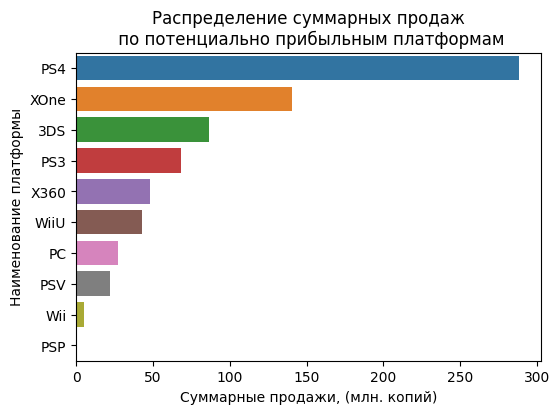

In [97]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='platform_total_sales',
    y=total_sales_by_actual_platform.index,
    data=total_sales_by_actual_platform,
)

ax.set_title('Распределение суммарных продаж\n по потенциально прибыльным платформам')
ax.set(xlabel='Суммарные продажи, (млн. копий)', ylabel='Наименование платформы');

На данном графике выделяются 9 платформ.

In [98]:
n_potentially_profitable_platform = 9

In [99]:
potentially_profitable_platform_names = (
    total_sales_by_actual_platform
    .nlargest(n_potentially_profitable_platform, 'platform_total_sales')
    .index
)

print(f'{n_potentially_profitable_platform} потенциально прибыльных платформ'
      + f' за последние {actual_period_in_years} лет:')
print(', '.join(potentially_profitable_platform_names))

9 потенциально прибыльных платформ за последние 3 лет:
PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV, Wii


Проверим годы активности этих платформ за последние 10 лет.

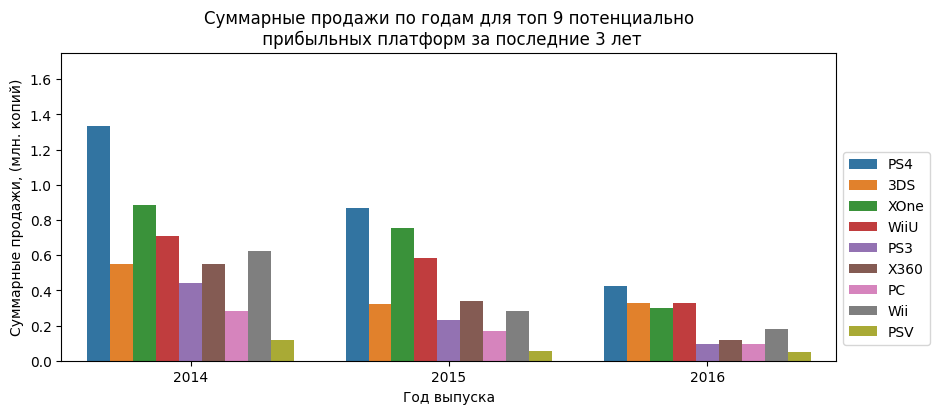

In [100]:
names_part = potentially_profitable_platform_names

potentially_profitable_platform = actual_data.query('platform in @names_part')

plt.figure(figsize=(10, 4))
plt.ylim(0, 1.75)
ax = sns.barplot(
    x='year_of_release',
    y='total_sales',
    hue="platform",
    data=potentially_profitable_platform,
    ci=None
)

ax.set_title(f'Суммарные продажи по годам для топ {n_potentially_profitable_platform}'
             + f' потенциально\n прибыльных платформ за последние {actual_period_in_years} лет')
ax.set(xlabel='Год выпуска', ylabel='Суммарные продажи, (млн. копий)')
ax.legend(title='Наименование платформы', loc='upper left')
plt.legend(bbox_to_anchor=(1, 0.7));

__Наблюдения сделанные по графику:__
 - __потенциально прибыльними__ можно считать платформы начавшие свою активность в середине периода активности, такими платформами являются __платформы с наибольшей суммарной прибылью__ за последние 4 года, их также можно считать __наиболее популярными__:
    - `PS4` 
    - `3DS` 
    - `XOne`
    - `WiiU`
   

In [101]:
# Наименования платформ, которые являются потенциально прибыльными на основе предыдущего анализа,
# отсортированные по убыванию суммарной прибыли
most_pot_prof_platform_names = ['PS4', '3DS', 'XOne', 'WiiU']
# (от англ. most potentially profitable platform)

In [102]:
(
    data.query('platform in @most_pot_prof_platform_names')
    .groupby('platform')
    .agg(platform_total_sales=('total_sales', 'sum'))
    .sort_values('platform_total_sales', ascending=False)
)

,platform_total_sales
platform,
PS4,314.14
3DS,257.81
XOne,159.32
WiiU,82.19


#### Диаграммы размаха по глобальным продажам игр в разбивке по платформам

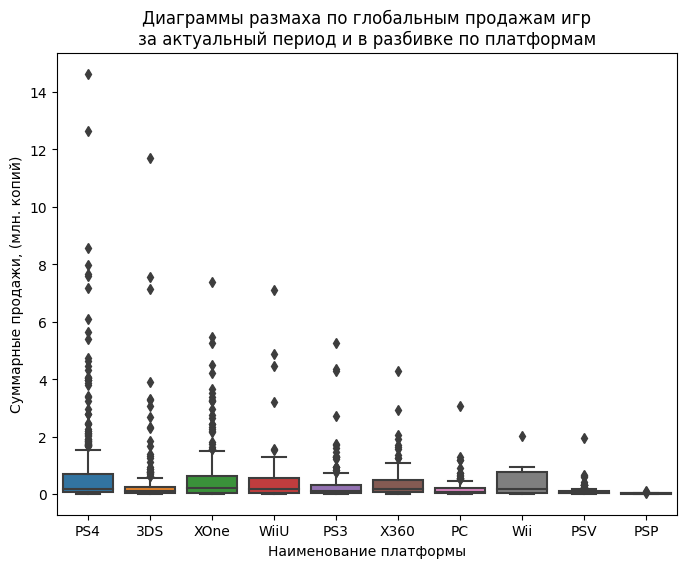

In [103]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x=actual_data.platform,
    y=actual_data.total_sales
)

ax.set_title('Диаграммы размаха по глобальным продажам игр\n'
             + 'за актуальный период и в разбивке по платформам')
ax.set(xlabel='Наименование платформы', ylabel='Суммарные продажи, (млн. копий)');

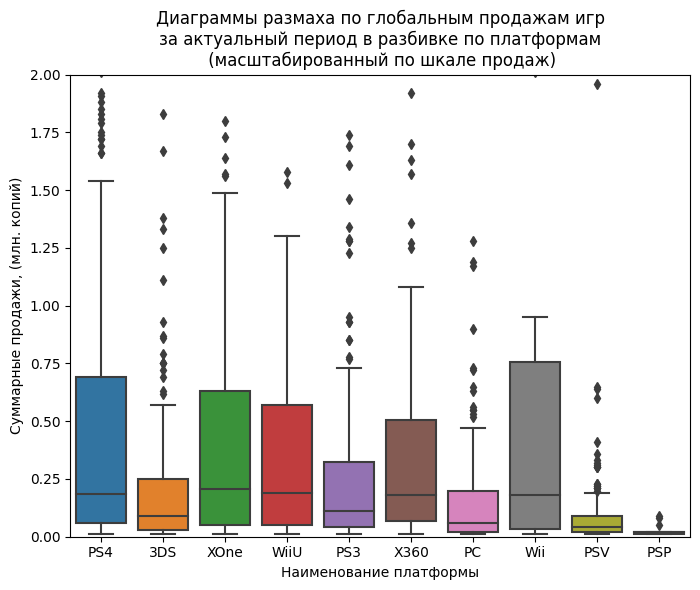

In [104]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 2)
ax = sns.boxplot(
    x=actual_data.platform,
    y=actual_data.total_sales
)

ax.set_title('Диаграммы размаха по глобальным продажам игр\n'
             + 'за актуальный период в разбивке по платформам\n'
             + ' (масштабированный по шкале продаж)')
ax.set(xlabel='Наименование платформы', ylabel='Суммарные продажи, (млн. копий)');

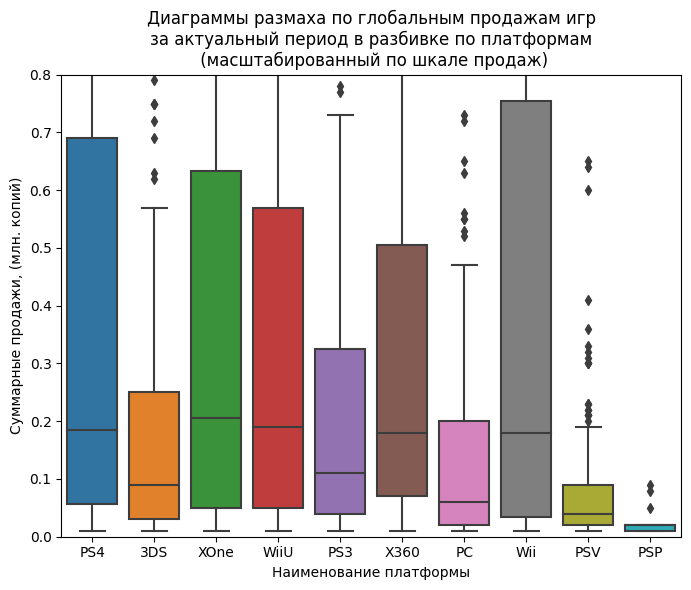

In [105]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 0.80)
ax = sns.boxplot(
    x=actual_data.platform,
    y=actual_data.total_sales
)

ax.set_title('Диаграммы размаха по глобальным продажам игр\n'
             + 'за актуальный период в разбивке по платформам\n'
             + ' (масштабированный по шкале продаж)')
ax.set(xlabel='Наименование платформы', ylabel='Суммарные продажи, (млн. копий)');

In [106]:
print('Наиболее прибыльные платформы за весь период:\n', ', '.join(most_profitable_platform_names))

Наиболее прибыльные платформы за весь период:
 PS2, X360, PS3, Wii, DS, PS


In [107]:
print('Потенциально прибыльные платформы:\n', ', '.join(most_pot_prof_platform_names))

Потенциально прибыльные платформы:
 PS4, 3DS, XOne, WiiU


Из анализа диаграмv размаха видно, что:
 - из 4 платформ (`PS4`, `3DS`, `XOne`, `WiiU`), выбранных как потенциально прибыльные, 3 (`PS4`, `XOne`, `WiiU`) имеют большую ширину `Q3-Q1`
 - из 6 наиболее прибыльных платформ за весь период (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`) 4 платформы (`X360`, `PS3`, `Wii`, `DS`) являются первыми с максимальнми (экстримальными) значения (выбросы) по продажам;
 - также отдельно можно отметить платформу `Wii`, у которой самое большое значение `Q3-Q1` из представленных на графике и практически нет выбросов. Самое большое значение `Q3-Q1` можно объяснить частым попадание суммарных продаж игр этой платформы в интервал`Q3-Q1`, не более 0.75 млн. копий.

#### Влияние отзывов пользователей и критиков на продажи внутри популярных платформ

##### Для платформы `PS4`

In [108]:
popular_platform_name = most_pot_prof_platform_names[0]
popular_platform_name

'PS4'

In [109]:
platform_data = actual_data.query('platform == @popular_platform_name')

In [110]:
platform_data.shape

(376, 14)

###### Влияние отзывов пользователей

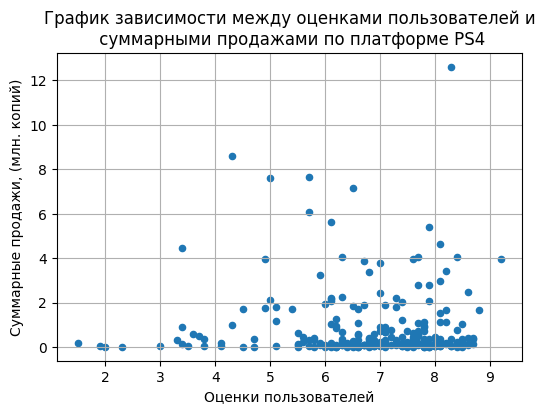

In [111]:
ax = platform_data.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    grid=True,
    figsize=(6, 4),
)

ax.set_title('График зависимости между оценками пользователей и\n'
             + f' суммарными продажами по платформе {popular_platform_name}')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

Посмотрим плотностную диаграмму, а также выведем сразу второй график, построенный по признаку `user_score_v2`, в котором пропцщенные значения и значение `tbd` заменены на медианное значение по жанру

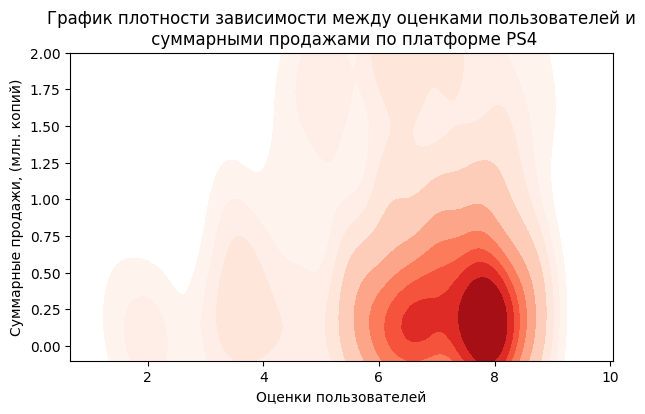

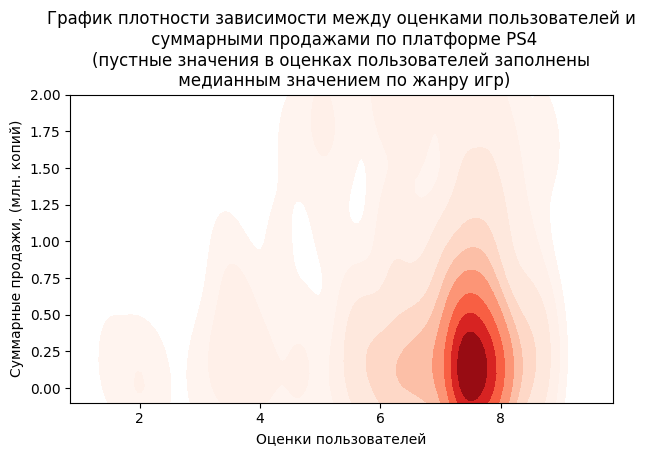

In [112]:
plt.figure(figsize=(7, 4))
plt.ylim(-0.1, 2)
ax = sns.kdeplot(
    x=platform_data.user_score,
    y=platform_data.total_sales,
    cmap="Reds", 
    shade=True,
    bw_adjust=.5
)
ax.set_title('График плотности зависимости между оценками пользователей'
             + f' и\n суммарными продажами по платформе {popular_platform_name}')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)')

plt.figure(figsize=(7, 4))
plt.ylim(-0.1, 2)
ax = sns.kdeplot(
    x=platform_data.user_score_v2,
    y=platform_data.total_sales,
    cmap="Reds", 
    shade=True,
    bw_adjust=.5
)
ax.set_title('График плотности зависимости между оценками пользователей'
            + f' и\n суммарными продажами по платформе {popular_platform_name}'
            + '\n(пустные значения в оценках пользователей заполнены\n медианным значением по жанру игр)')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

Из сравнения двух графиков видно, что замена пустых значений в признаке `user_score` приводить к локализации основной массы данных у оценки `7.5`, что искажает общую картину по данным. То есть, делаем вывод: признак `user_score_v2` лучше не использовать в анализе.

In [113]:
data.pivot_table(index='genre', values='user_score', aggfunc='median')['user_score'].median()

7.5

Проверим корреляцию между суммарными продажами и оценками пользователей

In [114]:
round(platform_data.total_sales.corr(platform_data.user_score), 2)

-0.04

Значение близкое к нулю - корреляции нет.

Попробуем сгруппировать продажи по оценкам пользователей и сложить, и посмотрим диаграмму разброса в этом случае

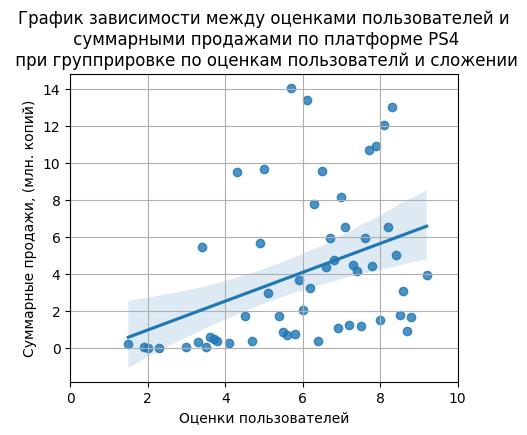

In [115]:
platform_data_grouped = (
    platform_data.groupby('user_score')
    .agg(total_sales_median=('total_sales', 'sum'))
)
platform_data_grouped.reset_index(inplace=True)

plt.figure(figsize=(5, 4))
plt.xlim(-0, 10)
plt.grid()
ax = sns.regplot(
    x=platform_data_grouped.user_score,
    y=platform_data_grouped.total_sales_median,
)

ax.set_title('График зависимости между оценками пользователей'
            + f' и\n суммарными продажами по платформе {popular_platform_name}'
            + '\n при групприровке по оценкам пользователй и сложении')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

В целом по вышеприведённым графикам можно сделать вывод, что для платформы `PS4` большая часть продаж приходится на диапазон оценок пользователей от 5.5 до 9. В этом диапазоне оценок продажи увеличиваются в сравнении с диапазоном оценок до 5.5, что на самом деле логично: пользователям нравится игра, они ставят высокие оценки, это в свою очередь служит рекламой, и игра продаётся ещё больше.

###### Влияние отзывов критиков

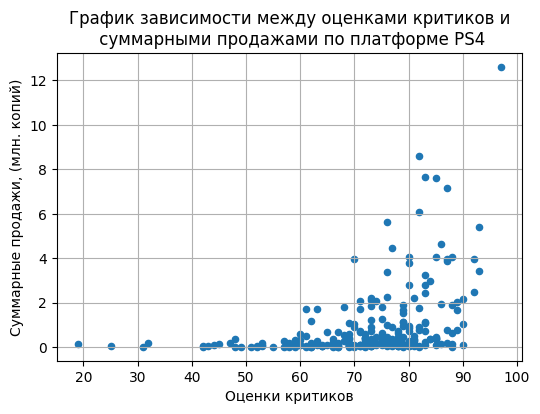

In [116]:
ax = platform_data.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    grid=True,
    figsize=(6, 4),
)

ax.set_title('График зависимости между оценками критиков'
             + f' и\n суммарными продажами по платформе {popular_platform_name}')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)');

Так же посмотрим плотностную диаграмму, и выведем второй график, построенный по признаку `critic_score_v2`, в котором пропуцщенные значения заменены на медианное значение по жанру

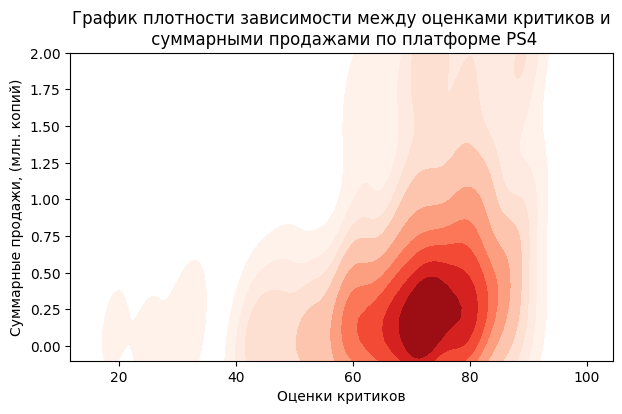

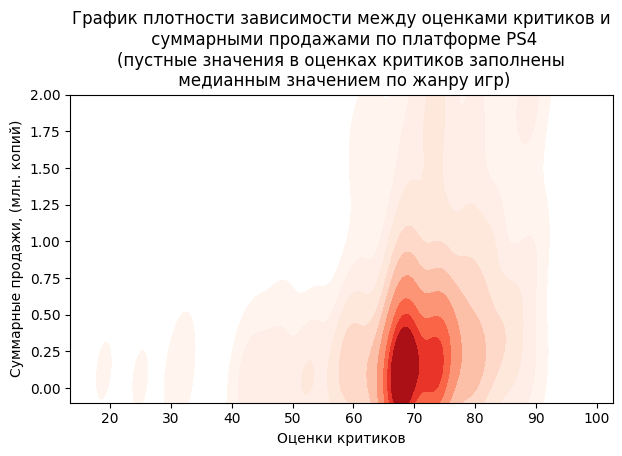

In [117]:
plt.figure(figsize=(7, 4))
plt.ylim(-0.1, 2)
ax = sns.kdeplot(
    x=platform_data.critic_score,
    y=platform_data.total_sales,
    cmap="Reds", 
    shade=True,
    bw_adjust=.5
)
ax.set_title('График плотности зависимости между оценками критиков'
             + f' и\n суммарными продажами по платформе {popular_platform_name}')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)')

plt.figure(figsize=(7, 4))
plt.ylim(-0.1, 2)
ax = sns.kdeplot(
    x=platform_data.critic_score_v2,
    y=platform_data.total_sales,
    cmap="Reds", 
    shade=True,
    bw_adjust=.5
)
ax.set_title('График плотности зависимости между оценками критиков'
            + f' и\n суммарными продажами по платформе {popular_platform_name}'
            + '\n(пустные значения в оценках критиков заполнены\n медианным значением по жанру игр)')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)');

Так же из сравнения двух графиков видно, что замена пустых значений приводить к смещению основной массы данных к оценки чуть ниже `70`. Использование признак `critic_score_v2` не целесообразно.

In [118]:
data.pivot_table(index='genre', values='critic_score', aggfunc='median')['critic_score'].median()

70.0

Проверим корреляцию между суммарными продажами и оценками критиков

In [119]:
round(platform_data.total_sales.corr(platform_data.critic_score), 2)

0.4

Есть слабая коррелиция - 0.4

Попробуем сгруппировать продажи по оценкам критиков и сложить, посмотрим диаграмму разброса в этом случае.

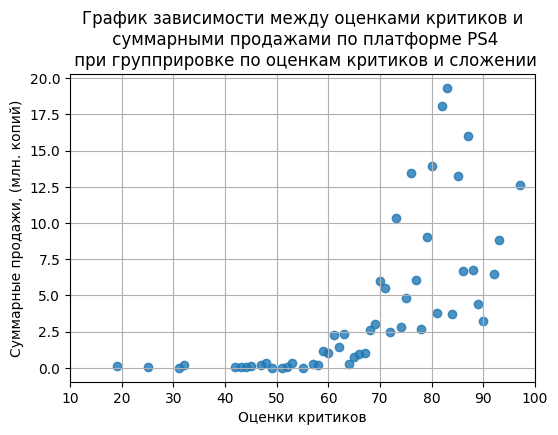

In [120]:
platform_data_grouped = (
    platform_data.groupby('critic_score')
    .agg(total_sales_median=('total_sales', 'sum'))
)
platform_data_grouped.reset_index(inplace=True)

plt.figure(figsize=(6, 4))
plt.xlim(10, 100)
plt.grid()
ax = sns.regplot(
    x=platform_data_grouped.critic_score,
    y=platform_data_grouped.total_sales_median,
    fit_reg=False
)

ax.set_title('График зависимости между оценками критиков'
            + f' и\n суммарными продажами по платформе {popular_platform_name}'
            + '\n при групприровке по оценкам критиков и сложении')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)');

По вышеприведённому анализу можно сделать следующие вывод:
 - суммарные продажи начинают расти в диапазоне оценок критиков от 55 до 90;
   - при этом
     - основная масса оценок критиков лежит в этом диапазоне - от 55 до 90;
     - корреляция между оценками критиков и суммарными продажами составляет 0.4

##### Для платформ `3DS`, `XOne`, `WiiU`

In [121]:
other_popular_platform_name = most_pot_prof_platform_names[1:]
other_popular_platform_name

['3DS', 'XOne', 'WiiU']

In [122]:
other_popular_platform_data = actual_data.query('platform in @other_popular_platform_name')

###### Влияние отзывов пользователей

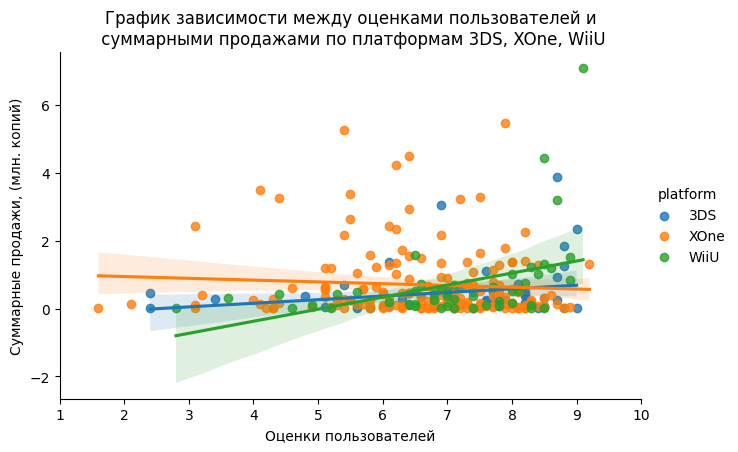

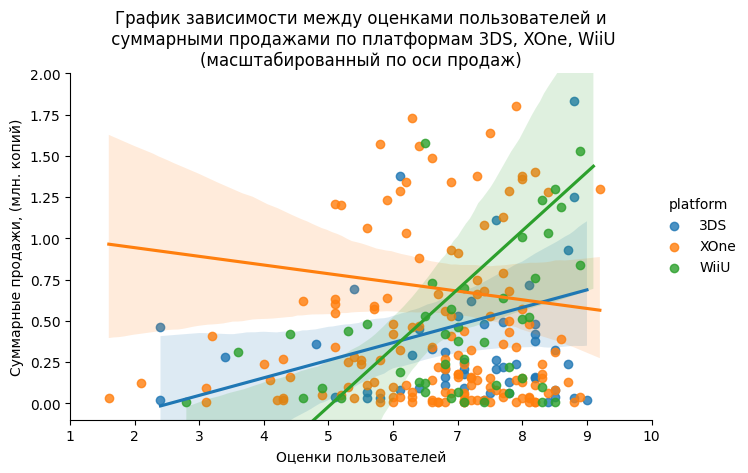

In [123]:
sns.lmplot(
    x="user_score",
    y="total_sales",
    hue='platform',
    data=other_popular_platform_data,
    height=4,
    aspect=1.6
)
ax = plt.gca()
ax.set(xlim=(1, 10))
ax.set_title("График зависимости между оценками пользователей и\n"
             + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}")
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

ax = sns.lmplot(
    x="user_score",
    y="total_sales",
    hue='platform',
    data=other_popular_platform_data,
    height=4,
    aspect=1.6
)
ax.set(xlim=(1, 10))
ax.set(ylim=(-0.1, 2))
ax = plt.gca()
ax.set_title("График зависимости между оценками пользователей и\n"
            + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}"
            + '\n(масштабированный по оси продаж)')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

In [124]:
def plot_user_score_to_total_sales(actual_data, platform_name):
    ax = (
        actual_data
        .query('platform == @platform_name')
        .plot(
            kind='scatter',
            x='user_score',
            y='total_sales',
            grid=True,
            figsize=(5, 4),
        )
    )

    ax.set_title('График зависимости между оценками пользователей и\n'
                 + f' суммарными продажами по платформе {platform_name}')
    ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

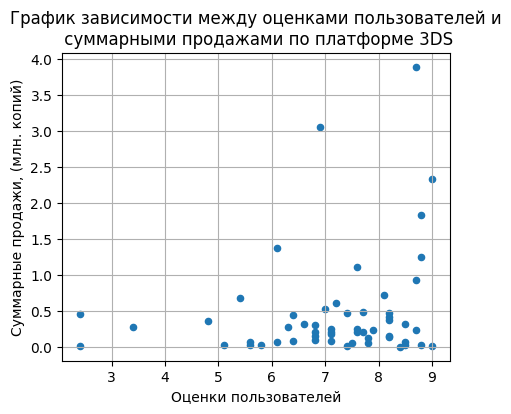

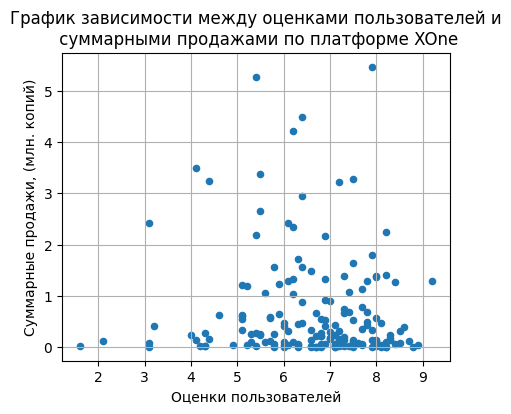

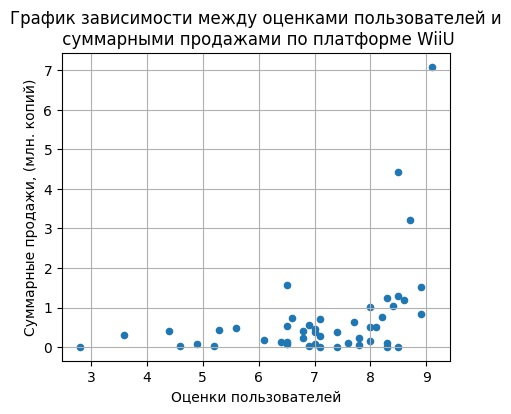

In [125]:
plot_user_score_to_total_sales(actual_data, '3DS')
plot_user_score_to_total_sales(actual_data, 'XOne')
plot_user_score_to_total_sales(actual_data, 'WiiU')

Выводы по графикам:
 - из трёх платформ `3DS`, `XOne`, `WiiU` gkfnajhvf `XOne` имеет больше игр, при этом оценки и суммарные продажи имеют большее разнообразие чем для платформ `3DS`, `WiiU`
 - для платформы `WiiU` для всех игр с оценка до 8.5  суммарные продажи не превосходили 2 млн. копий;
  - в то время как для платформы `XOne` много игр с оценкой начина от 3 и до 8.5 имели продажи выше 2 млн. копий и до 5 млн. копий;
 -  максимальное количество продаж у платформы `WiiU`: это чуть больше 7 млн. копий при оценке больше 9.  

Посмотрим корреляцию

In [126]:
other_popular_platform_data.groupby('platform')[['total_sales', 'user_score']].corr()

total_sales  user_score
platform                                     
3DS      total_sales     1.000000    0.215193
         user_score      0.215193    1.000000
WiiU     total_sales     1.000000    0.407926
         user_score      0.407926    1.000000
XOne     total_sales     1.000000   -0.070384
         user_score     -0.070384    1.000000

Сруппируем по оценкам пользователей и сложим продажи внутри групп

In [127]:
other_platform_grouped = (
    other_popular_platform_data.groupby(['platform', 'user_score'])
    .agg(total_sales_median=('total_sales', 'sum'))
)
other_platform_grouped.reset_index(inplace=True)

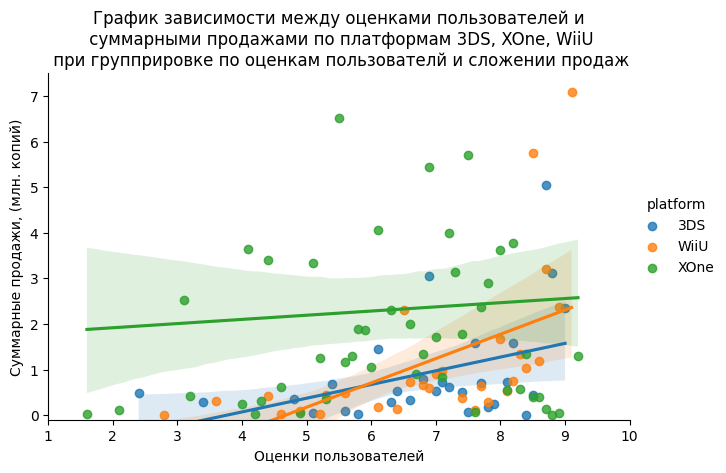

In [128]:
ax = sns.lmplot(
    x="user_score",
    y="total_sales_median",
    hue='platform',
    data=other_platform_grouped,
    height=4,
    aspect=1.6
)
ax.set(xlim=(1, 10))
ax.set(ylim=(-0.1, 7.5))

ax = plt.gca()
ax.set_title("График зависимости между оценками пользователей и\n"
            + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}"
            + '\n при групприровке по оценкам пользователй и сложении продаж')
ax.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, (млн. копий)');

In [129]:
other_platform_grouped.groupby('platform')[['total_sales_median', 'user_score']].corr()

total_sales_median  user_score
platform                                                   
3DS      total_sales_median            1.000000    0.411489
         user_score                    0.411489    1.000000
WiiU     total_sales_median            1.000000    0.543323
         user_score                    0.543323    1.000000
XOne     total_sales_median            1.000000    0.066641
         user_score                    0.066641    1.000000

Вывод по платформам `3DS`, `XOne`, `WiiU`:
 - основаная часть продаж сосредоточена в диапазоне оценок пользователей от 5 до 9
 - корреляция между суммарными продажами и оценками пользователей незначительна:
    - для `3DS` 0.21 
    - для `WiiU` 0.4
    - для `XOne` -0.07
 - при группировке по оценкам пользователей и сложении продаж корреояция для двух платформ увеличивается:
    - для `3DS` 0.41 
    - для `WiiU` 0.54
    - для `XOne` практически не изменяется 0.066

###### Влияние отзывов критиков

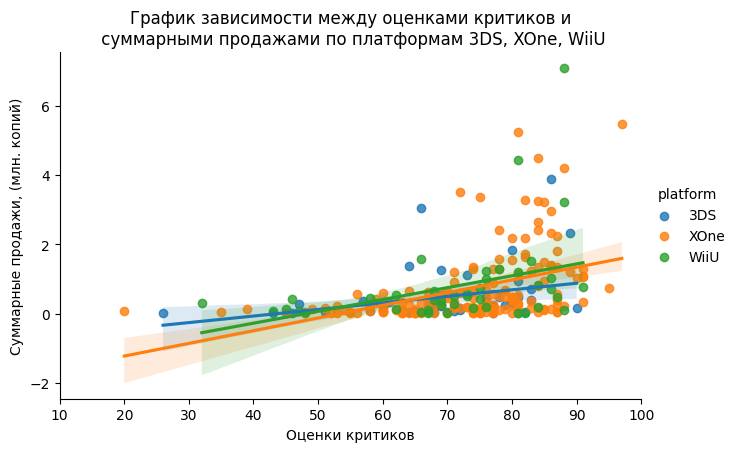

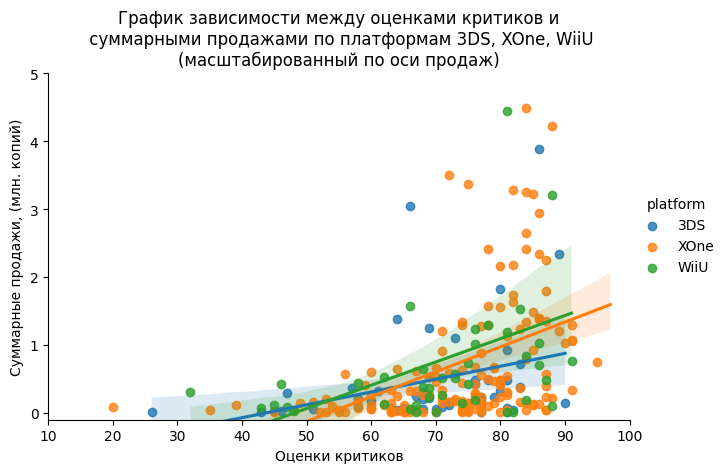

In [130]:
ax = sns.lmplot(
    x="critic_score",
    y="total_sales",
    hue='platform',
    data=other_popular_platform_data,
    height=4,
    aspect=1.6
)
ax.set(xlim=(10, 100))
ax = plt.gca()
ax.set_title("График зависимости между оценками критиков и\n"
             + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}")
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)')


ax = sns.lmplot(
    x="critic_score",
    y="total_sales",
    hue='platform',
    data=other_popular_platform_data,
    height=4,
    aspect=1.6
)
ax.set(xlim=(10, 100))
ax.set(ylim=(-0.1, 5));
ax = plt.gca()
ax.set_title("График зависимости между оценками критиков и\n"
            + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}"
            + '\n(масштабированный по оси продаж)')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)');

Посмотрим корреляцию

In [131]:
other_popular_platform_data.groupby('platform')[['total_sales', 'critic_score']].corr()

total_sales  critic_score
platform                                        
3DS      total_sales      1.000000      0.314117
         critic_score     0.314117      1.000000
WiiU     total_sales      1.000000      0.370201
         critic_score     0.370201      1.000000
XOne     total_sales      1.000000      0.428677
         critic_score     0.428677      1.000000

Cгруппируем по оценкам критиков и сложим продажи внутри групп

In [132]:
other_platform_grouped = (
    other_popular_platform_data.groupby(['platform', 'critic_score'])
    .agg(total_sales_median=('total_sales', 'sum'))
)
other_platform_grouped.reset_index(inplace=True)

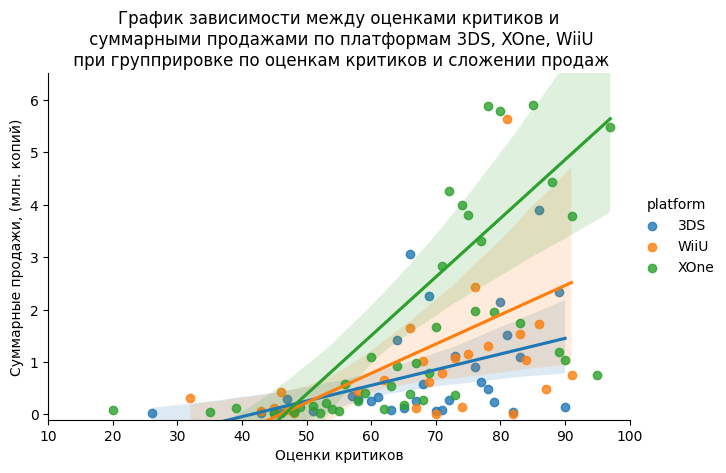

In [133]:
ax = sns.lmplot(
    x="critic_score",
    y="total_sales_median",
    hue='platform',
    data=other_platform_grouped,
    height=4,
    aspect=1.6,
)
ax.set(xlim=(10, 100))
ax.set(ylim=(-0.1, 6.5))

ax = plt.gca()
ax.set_title("График зависимости между оценками критиков и\n"
            + f" суммарными продажами по платформам {', '.join(other_popular_platform_name)}"
            + '\n при групприровке по оценкам критиков и сложении продаж')
ax.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, (млн. копий)');

Корреляция после группировки и сложении

In [134]:
other_platform_grouped.groupby('platform')[['total_sales_median', 'critic_score']].corr()

total_sales_median  critic_score
platform                                                     
3DS      total_sales_median            1.000000      0.450685
         critic_score                  0.450685      1.000000
WiiU     total_sales_median            1.000000      0.415648
         critic_score                  0.415648      1.000000
XOne     total_sales_median            1.000000      0.586563
         critic_score                  0.586563      1.000000

Вывод по платформам `3DS`, `XOne`, `WiiU`:
 - основаная часть продаж сосредоточена в диапазоне оценок критиков от 40 до 90;
 - в диапазоне оценок критиков от 40 до 90 продажи растут
 - корреляция между суммарными продажами и оценками критиков слабая:
    - для `3DS` 0.31
    - для `WiiU` 0.37
    - для `XOne` 0.42
 - при группировке по оценкам критиков и сложении продаж корреляция увеличивается:
    - для `3DS` 0.45 
    - для `WiiU` 0.41
    - для `XOne` 0.58

#### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [135]:
total_sales_by_genre = (
    actual_data.groupby('genre')
    .agg(genre_total_sales=('total_sales', 'median'),
        median_sales=('total_sales', 'median'),
        mean_sales=('total_sales', 'mean'),
        count_sales=('total_sales', 'count'))
)
total_sales_by_genre = total_sales_by_genre.sort_values('genre_total_sales', ascending=False)
total_sales_by_genre.head(10)

,genre_total_sales,median_sales,mean_sales,count_sales
genre,,,,
Shooter,0.515,0.515,1.335469,128
Sports,0.180,0.180,0.680000,161
Platform,0.140,0.140,0.476053,38
Fighting,0.125,0.125,0.470333,60
Role-Playing,0.110,0.110,0.459005,221
Simulation,0.100,0.100,0.298409,44
Action,0.090,0.090,0.322068,619
Misc,0.090,0.090,0.332301,113
Racing,0.090,0.090,0.398841,69


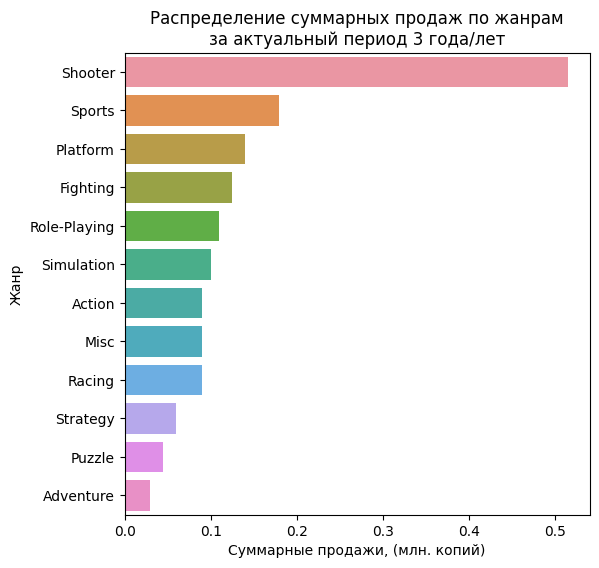

In [136]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x='genre_total_sales',
    y=total_sales_by_genre.index,
    data=total_sales_by_genre,
)

ax.set_title('Распределение суммарных продаж по жанрам'
             + f'\nза актуальный период {actual_period_in_years} года/лет')
ax.set(xlabel='Суммарные продажи, (млн. копий)', ylabel='Жанр');

Данные на грфике можно разделить на 3 группы:
 - 1-ая группа: самые прибыльные жанры с прибыль более 170 млн. копий за 3 последних года, это жанры `Action` и `Shooter`;
 - 2-ая грцппа: жанры с прибылью от 100 до 110 млн. копий за 3 последних года: `Sports`, `Role-Playing`
 - 3-я группа: все оставшиеся жанры с прибылью менее 40 млн. копий за 3 последних года.

1-ая и 2-ая группы выделяются по количеству продаж в сравнении с 3-ей группой:
 - в сумме 1-ая и 2-ая группы имею продажы 581 млн. копий;
 - 3- гпуппа  148 млн. копий

In [137]:
total_sales_by_genre[:4].genre_total_sales.sum()

0.9600000000000001

In [138]:
total_sales_by_genre[4:].genre_total_sales.sum()

0.615

### Портрет пользователя регионов `North America`, `Europe`, `Japan`

#### Самые популярные платформы (топ-5)

In [139]:
top_n = 5

In [140]:
data_by_platform = (
    actual_data
    [['platform', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
    .groupby('platform')
    .agg('sum')
)
data_by_platform.reset_index(inplace=True)
data_by_platform['na_fraction_in_total_sales'] = round(data_by_platform.na_sales / data_by_platform.total_sales, 2)
data_by_platform['eu_fraction_in_total_sales'] = round(data_by_platform.eu_sales / data_by_platform.total_sales, 2)
data_by_platform['jp_fraction_in_total_sales'] = round(data_by_platform.jp_sales / data_by_platform.total_sales, 2)

#####  `North America`

In [141]:
na_top_platform = (
    data_by_platform
    .sort_values('na_sales', ascending=False)
    [['platform', 'na_sales', 'na_fraction_in_total_sales']]
    .head(top_n)
)
na_top_platform

,platform,na_sales,na_fraction_in_total_sales
3,PS4,98.61,0.34
9,XOne,81.27,0.58
8,X360,28.30,0.59
0,3DS,22.64,0.26
2,PS3,22.05,0.32


In [142]:
def plot_top_platform(region_name, region, top_platform):
    region_fractions_bars = top_platform[region + '_fraction_in_total_sales'] * 100
    other_fractions_bars = 100 - region_fractions_bars

    plt.bar(
        x=top_platform.platform,
        height=region_fractions_bars,
        color='#b5ffb9',
        edgecolor='white'
    )
    plt.bar(
        x=top_platform.platform,
        height=other_fractions_bars,
        bottom=region_fractions_bars,
        color='#f9bc86',
        edgecolor='white'
    )

    plt.title(f'Доля топ {top_n} популярных платформ в регионе \'{region_name}\''
              + '\n от мировых продаж, выраженная в процентах' )
    plt.xlabel('Наименование платформы')
    plt.ylabel('Проценты от мировых продаж')
    plt.show()

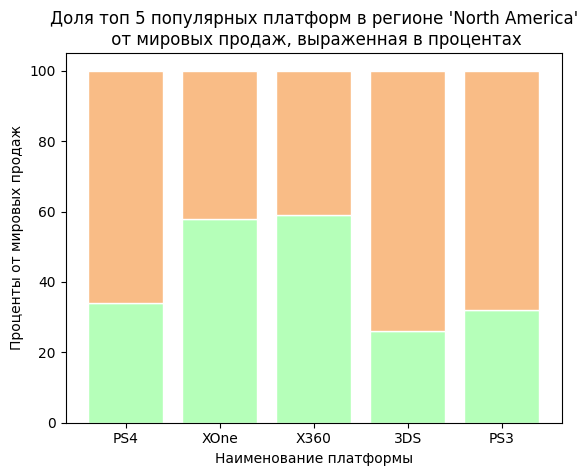

In [143]:
plot_top_platform('North America', 'na', na_top_platform)

 __Для региона `North America`__
 - Топ 5 популярных платформ : `PS4`, `XOne`, `X360`, `3DS`, `PS3`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `PS4` 0.34
    - `XOne` 0.58
    - `X360` 0.59
    - `3DS` 0.26
    - `PS3` 0.32

#####  `Europe`

In [144]:
eu_top_platform = (
    data_by_platform
    .sort_values('eu_sales', ascending=False)
    [['platform', 'eu_sales', 'eu_fraction_in_total_sales']]
    .head(top_n)
)
eu_top_platform

,platform,eu_sales,eu_fraction_in_total_sales
3,PS4,130.04,0.45
9,XOne,46.25,0.33
2,PS3,25.54,0.37
1,PC,17.97,0.66
0,3DS,16.12,0.19


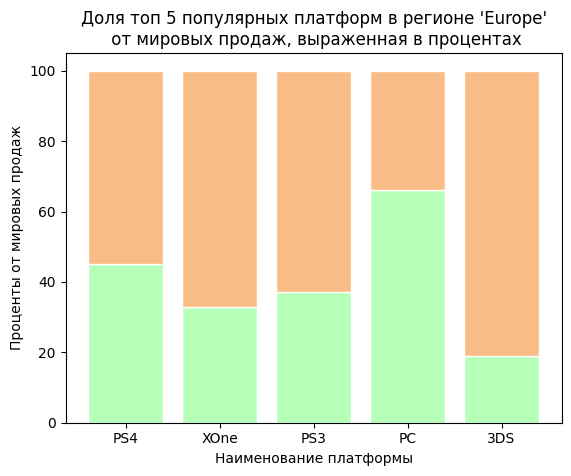

In [145]:
plot_top_platform('Europe', 'eu', eu_top_platform)

 __Для региона `Europe`__
 - Топ 5 популярных платформ : `PS4`, `XOne`, `PS3`, `PC`, `3DS`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `PS4` 0.45
    - `XOne` 0.33
    - `PS3` 0.37
    - `PC` 0.66
    - `3DS` 0.19

#####  `Japan`

In [146]:
jp_top_platform = (
    data_by_platform
    .sort_values('jp_sales', ascending=False)
    [['platform', 'jp_sales', 'jp_fraction_in_total_sales']]
    .head(top_n)
)
jp_top_platform

,platform,jp_sales,jp_fraction_in_total_sales
0,3DS,44.24,0.51
3,PS4,15.02,0.05
5,PSV,14.54,0.65
2,PS3,11.22,0.16
7,WiiU,7.31,0.17


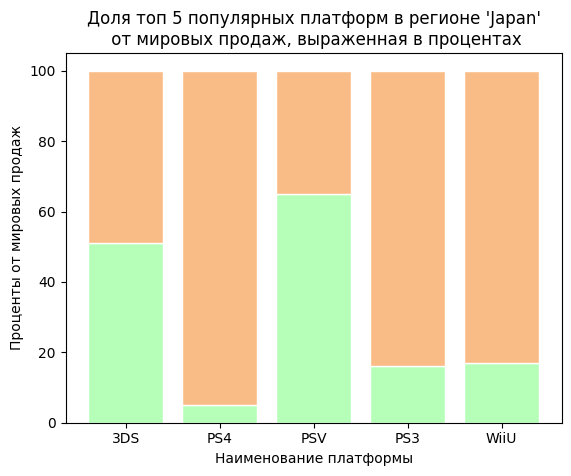

In [147]:
plot_top_platform('Japan', 'jp', jp_top_platform)

 __Для региона `Japan`__
 - Топ 5 популярных платформ : `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `3DS` 0.51
    - `PS4` 0.05
    - `PSV` 0.65
    - `PS3` 0.16
    - `WiiU` 0.17

#### Самые популярные жанры (топ-5)

In [148]:
top_n = 5

In [149]:
data_by_genre = (
    actual_data
    [['genre', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
    .groupby('genre')
    .agg('sum')
)
data_by_genre.reset_index(inplace=True)
data_by_genre['na_fraction_in_total_sales'] = round(data_by_genre.na_sales / data_by_genre.total_sales, 2)
data_by_genre['eu_fraction_in_total_sales'] = round(data_by_genre.eu_sales / data_by_genre.total_sales, 2)
data_by_genre['jp_fraction_in_total_sales'] = round(data_by_genre.jp_sales / data_by_genre.total_sales, 2)

##### `North America`

In [150]:
na_top_genre = (
    data_by_genre
    .sort_values('na_sales', ascending=False)
    [['genre', 'na_sales', 'na_fraction_in_total_sales']]
    .head()
)
na_top_genre

,genre,na_sales,na_fraction_in_total_sales
8,Shooter,79.02,0.46
0,Action,72.53,0.36
10,Sports,46.13,0.42
7,Role-Playing,33.47,0.33
3,Misc,15.05,0.40


In [151]:
def plot_top_genre(region_name, region, top_genre):
    region_fractions_bars = top_genre[region + '_fraction_in_total_sales'] * 100
    other_fractions_bars = 100 - region_fractions_bars

    plt.bar(
        x=top_genre.genre,
        height=region_fractions_bars,
        color='#b5ffb9',
        edgecolor='white'
    )
    plt.bar(
        x=top_genre.genre,
        height=other_fractions_bars,
        bottom=region_fractions_bars,
        color='#f9bc86',
        edgecolor='white'
    )

    plt.title(f'Доля топ {top_n} популярных жанров в регионе \'{region_name}\''
              + '\n от мировых продаж, выраженная в процентах' )
    plt.xlabel('Жанр')
    plt.ylabel('Проценты от мировые продаж')
    plt.show()

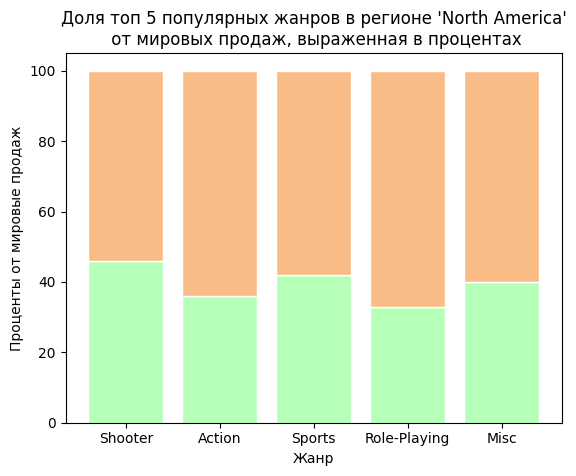

In [152]:
plot_top_genre('North America', 'na', na_top_genre)

 __Для региона `North America`__
 - Топ 5 популярных жанров: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Shooter` 0.46
    - `Action` 0.36
    - `Sports` 0.42
    - `Role-Playing` 0.33
    - `Misc` 0.40

##### `Europe`

In [153]:
eu_top_genre = (
    data_by_genre
    .sort_values('eu_sales', ascending=False)
    [['genre', 'eu_sales', 'eu_fraction_in_total_sales']]
    .head()
)
eu_top_genre

,genre,eu_sales,eu_fraction_in_total_sales
0,Action,74.68,0.37
8,Shooter,65.52,0.38
10,Sports,45.73,0.42
7,Role-Playing,28.17,0.28
6,Racing,14.13,0.51


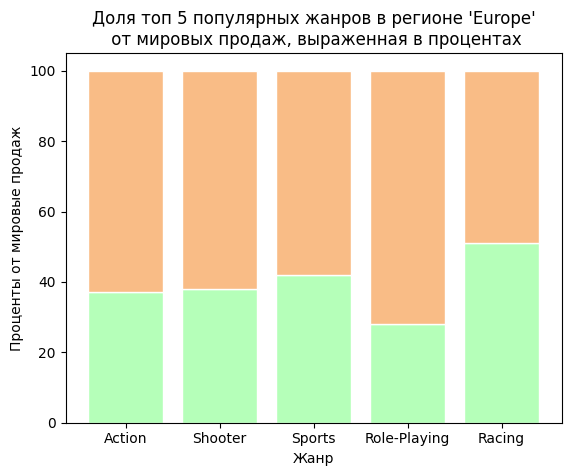

In [154]:
plot_top_genre('Europe', 'eu', eu_top_genre)

 __Для региона `Europe`__
 - Топ 5 популярных жанров: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Action` 0.37
    - `Shooter` 0.38
    - `Sports` 0.42
    - `Role-Playing` 0.28
    - `Racing` 0.51

##### `Japan`

In [155]:
jp_top_genre = (
    data_by_genre
    .sort_values('jp_sales', ascending=False)
    [['genre', 'jp_sales', 'jp_fraction_in_total_sales']]
    .head()
)
jp_top_genre

,genre,jp_sales,jp_fraction_in_total_sales
7,Role-Playing,31.16,0.31
0,Action,29.58,0.15
2,Fighting,6.37,0.23
3,Misc,5.61,0.15
8,Shooter,4.87,0.03


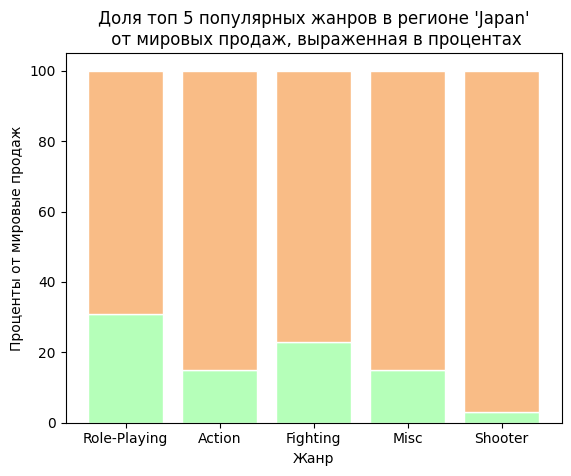

In [156]:
plot_top_genre('Japan', 'jp', jp_top_genre)

 __Для региона `Japan`__
 - Топ 5 популярных жанров: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Role-Playing` 0.31
    - `Action` 0.15
    - `Fighting` 0.23
    - `Misc` 0.15
    - `Shooter` 0.03

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [157]:
actual_data.rating.value_counts(dropna=False)

NaN     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

In [158]:
data_by_rating = (
    actual_data
    [['rating', 'na_sales', 'eu_sales', 'jp_sales']]
    .groupby('rating', dropna=False)
    .agg('sum')
)

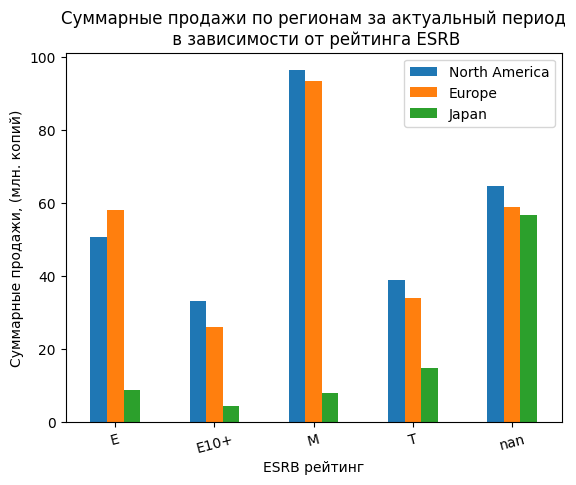

In [159]:
ax = data_by_rating.plot(
    kind='bar'
)

ax.set_title('Суммарные продажи по регионам за актуальный период'
            + '\n в зависимости от рейтинга ESRB')
ax.set(xlabel='ESRB рейтинг', ylabel='Суммарные продажи, (млн. копий)');
ax.legend(['North America', 'Europe', 'Japan'])
plt.xticks(rotation=15);

На основе анализа диаграмм можно сделать следующие __выводы__:
 - Влииние рейтинга ESRB на суммарные продажи выражено явно;
 - за актуальный период 3 года представлены 4 значения рейтинга(`E`, `E10+`, `M`, `T`) во всех 3-х регионах плюс группа без рейтинга (с `nan`);
   - при этом для этих 4-х значений влияние на суммарные продажи одинаковое во всех 3-х регионах, например, можно отметить что:
      - для значения рейтинга `M` продажи максимальные во всех 3-х регионах;
      - для значения рейтинга `E10+` продажи минимальны во всех 3-х регионах;
 - так же необходимо выделить отдельную группу без рейтинга (на диаграмме обозначена как `nan`):
    - для регионов `North America` и `Europe` суммарные продажи в этой группе практически приближаются к группе с рейтингом `E` - лидеру продаж;
    - для региона `Japan` суммарные продажи в этой группе являются абсолютным лидером: это можно объяснить тем, что в Японии существую своя национальная рейтинговая система [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), рейтинги который в датасете не представлены.

### Проверка гипотез

#### Гипотеза 1: Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

Сформулируем нулевую и альтернативную гипотезы

 - __H0__ нулевая гипотеза: средние пользовательские __рейтинги__ платформ `Xbox One` и `PC` __одинаковые__
 - __H1__ альтернативная гипотеза: средние пользовательские __рейтинги__ платформ `Xbox One` и `PC` __разные__

Логично предположить, что все пользователи платформы `Xbox One` и все пользователи платформы `PC` это две независимые генеральные совокупности. В данном датасете представлены выборки из обоих генеральных совокупностей.

Сохраним выборки по платформам `Xbox One` и `PC` в два разных массива

In [160]:
xboxone_data = actual_data.query('platform == "XOne" and not user_score.isna()').user_score.sample(122)
xboxone_data.shape

(122,)

In [161]:
pc_data = actual_data.query('platform == "PC" and not user_score.isna()').user_score
pc_data.shape

(122,)

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используется `T-test` - это метод `stats.ttest_ind(array1, array2, equal_var)` из пакета `scipy`.

Оснований нет, чтобы полагать, что дисперсии оценок пользователей разные для двух генеральных совокупностх `Xbox One` и `PC`. Логично предположить, что поведение пользователей в среднем одинаковое при выставлении оценок по платформам `Xbox One` и `PC`.

Но всё же проверим дисперсии выборок.

In [162]:
xboxone_data.describe()['std']**2

2.0023005012870883

In [163]:
pc_data.describe()['std']**2

2.901154315133451

В итоге дисперсии по выборкам отличаются. Поэтому присвоим значение `False` аргументу `equal_var` метода `stats.ttest_ind` при проведении теста.

Пороговое значение `alpha` возьмём `0.05`

In [164]:
alpha = 0.05

results = st.ttest_ind(xboxone_data, pc_data, equal_var=False)

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08726685938461727
Не получилось отвергнуть нулевую гипотезу


p-значение меньшее `0.05`,  означает, что вероятность получить такое различие средних в выборках `xboxone_data` и `pc_data` равна p-значению, при условии, что нулевая гипотеза верна.

__Вывод:__
 - __Гипотеза__ о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые __не может быть отверганутв__ при пороговом значении `alpha` равном `0.05`;
 - Другими словами это означает, что различие средних пользовательских рейтингов платформ `Xbox One` и `PC`статистически незначимо.

#### Гипотеза 2: Средние пользовательские рейтинги жанров `Action` и `Sports` разные

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы

 - __H0__ нулевая гипотеза: средние пользовательские __рейтинги__ жанров `Action` и `Sports` __одинаковые__
 - __H1__ альтернативная гипотеза: средние пользовательские __рейтинги__ жанров `Action` и `Sports` __разные__

Здесь также предположить, что все пользователи, оценившие игры жанра `Action` и все пользователи оценившие игры жанра `Sports` это две независимые генеральные совокупности. Конечно на самом деле может быть ситуация, что какой-то пользователь оценивал и игры жанра `Action` и игры жанра `Sports`. Но всё же предположим, что либо таких пользователей нет, или же, что более вероятно, что между оценками такого пользователя для игр жанра `Action` и для игр жанра `Sports` нет никакой зависимости, одна не влияет на другую и наоборот.

В данном датасете представлены выборки из обоих генеральных совокупностей.<br>
Сохраним выборки жанров `Action` и `Sports` в два разных массива

In [165]:
action_data = actual_data.query('genre == "Action" and not user_score.isna()').user_score.sample(127)
action_data.shape

(127,)

In [166]:
sports_data = actual_data.query('genre == "Sports" and not user_score.isna()').user_score
sports_data.shape

(127,)

Проверим дисперсии выборок

In [167]:
action_data.describe()['std']**2

2.0249706286714164

In [168]:
sports_data.describe()['std']**2

3.446979127609048

Дисперсии по выборкам отличаются. Поэтому для теста выставляем `equal_var` в `False`

Пороговое значение `alpha` возьмём `0.05`

In [169]:
alpha = 0.05

results = st.ttest_ind(action_data, sports_data, equal_var=False)

print(f'p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.065854242191285e-13
Отвергаем нулевую гипотезу


 p-значение большее порогового значения `alpha = 0.05` означает, что вероятность получить такое различие средних в выборках `action_data` и `sports_data` равна p-значению, при условии, что нулевая гипотеза верна.

__Вывод:__
 - Нулевая гипотеза о том, что средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые отвергается при пороговом значении `alpha` равном `0.05`;
 - __Гипотеза__ о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные __не может быть отвергнута__ ;
 - Другими словами это означает, что различие средних пользовательских рейтингов платформ `Action` и `Sports` статистически значимо.

### Общий вывод

1. Общая информация по датасету:
 - датасет содержит 16715 строк и 11 признаков;
 - в 6 признаках есть пропущенные значения;
 - по первоначальной оценке 3 признака имеют несоответствующий тип данных, это признаки `Year_of_Release`, `Critic_Score` и `User_Score`;
 - явных дубликатов нет;
 - признаки содержащие количество продаж имеют много значений близких к нулю.

2. Информация по результатам предобработки данных:
 - все признаки переименованы: приведены к нижнему `snake_case`;
 - преобработка признаков:
    - в признаке `name` 2 пропуска, оставлены без изменений;
       - причины пропусков: можно предположить, что пропуски в `name` связаны с ошибкой ввода информации, или хранения, или выгрузки данных из БД. Другими словами это технологическая ошибка. Менее вероятно, что это человеческий фактор, то есть, что тот кто вводил эту информацию в систему (в базу данных), увидев пропуски не уточнил бы эту информацию. Но это только предположение.
    - в признаке `year_of_release` удалено 269 пропусков, тип данных признака заменён на `int`;
       - причины пропусков в этом признаке предположить сложно. Как видно из анализа пропуске не отностся к какой-либо группе либо платформе либо по жанру. При этом прибль от строк с пропусками распределна в среднем равномерно по всем регионам. Причины пропусков можно сформулировать только в общем виде: либо технологическая ошибка, либо человеческий фактор.
    - 2 пропуска в признаке `genre` совапдают с пропуска в признаке `name`,  оставлены без изменений;
    - в признаке `critic_score` 51% пропущенных значений. Изначальный признак `critic_score` оставлен без изменений, добавлен новый признак `critic_score_v2` с заменой пропусков медианным значение по жанру для дальнейшего анализа эффективности такой замены;
      - в результате исследования установлено, что использование признака `critic_score_v2` неэффективно;
    - в признаке `user_score` в сумме 55% пропусков или несоответствующих  значение `tbd`. Они также заменены медианным начением по жанру с продублированном новом признаке `user_score_v2`;
      - в результате исследования установлено, что использование признака `user_score_v2` неэффективно;
    - в признаке `rating` не менее 40%. Признак оставлен без изменений;
    - пропуски в признаке `rating` пересекаются с пропусками в признаках `critic_score` и `user_score`;
       - Пропуски в рейтингах вероятнее всего связаны с тем что в Японии существует своя рейтинговая система, и для игр произведённых или выпускаемых в Японии, рейтинги американской ESRB просто не определялись. Или же статистика по Японии просто не продпологала фиксирование/определение ESRB рейтинга. Далее можно предположить, что связь между оценкаим экспертов и рейтингами есть, например экспертная оценка выдаётся экспертами той же организацией, что и проставляет рейтинги, то есть нет ESRB рейтинга и следовательно нет экспертной оценки. Для оценок пользователей такую связть прелположить сложнее. Моловероятно, но можно предположить, что статистика по Японии не предполагала оценок пользователей.
 - добавлен новый принак `total_sales`, содержащий суммарные продажи по всем регионам.

3. Исследовательский анализ данных

 3.1. Распределение количества игр по годам

Результат исследования:
 - пик по количеству выпущенных игр приходится на 2008, 2009 годы - это чуть более 1400 игр в год;
 - до 2008 года наблюдается относительно равномерный рос, начиная с 1991, с небольшими локальными спадами в 1999, 2000 и 2003, 2004 годах;
 - после 2009 года наблюдается спад количества выпущенных игр, с резким падением почти в 2 раза в 2012 году.

Рост до 2008 можно связать с бурным развитием компьютерных технологий в этот период как software так и hardware. А резкий спад после 2008-2009 годов - с мировым финансовым кризисом в эти годы.

В зависимость от целей исследования важны данные за разные периоды. Так, например, можно предположить, что для построения прогноза на будущие годы будут важнее более актуальные данные, например, за последний 10-летний или 20-летниий период. Данные же за период, например, ранее 2000 года будут менее важны, потому что те технологии, на которых разрабатывались такие игры, уже устарели и почти не используются.

3.2.  Продажи по платформам

Результат исследования:
 - 6 платформ с наибольшими суммарными продажами за весь период: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`;
 - за последние четыре года (2013, 2014, 2015, 2016) из 6 платформ с наибольшими суммарными продажами за весь период наиболее активны по продажам платформы `Wii`, `X360`, `PS3`;
 - для платформы `DS` можно отметить основной период активности с 2004 по 2013 годы, при этом были небольшие продажи в 1985 году.
 - периоды наибольших продаж (периоды активности) для разных платформ приходятся на разные годы;

В результате исследования установлен средний период активности платформ, он составляет 10 лет. Можно сказать, что в среднем за период 10 лет старые платформы исчезают, и повляются новые.

3.3.  Определение потенциально прибыльных платформ

По результатам исследования потенциально прибыльними можно считать платформы начавшие свою активность в середине периода активности, такими платформами являются платформы с наибольшей суммарной прибылью за последние 4 года, их также можно считать наиболее популярными:
 - PS4, 3DS, XOne, WiiU

3.4.  Диаграммы размаха по глобальным продажам игр в разбивке по платформам

Выводы из анализа диаграмv размаха:
 - из 4 платформ (`PS4`, `3DS`, `XOne`, `WiiU`), выбранных как потенциально прибыльные, 3 (`PS4`, `XOne`, `WiiU`) имеют большую ширину `Q3-Q1`
 - из 6 наиболее прибыльных платформ за весь период (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`) 4 платформы (`X360`, `PS3`, `Wii`, `DS`) являются первыми с максимальнми (экстримальными) значения (выбросы) по продажам;
 - также отдельно можно отметить платформу `Wii`, у которой самое большое значение `Q3-Q1` из представленных на графике и практически нет выбросов. Самое большое значение `Q3-Q1` можно объяснить частым попадание суммарных продаж игр этой платформы в интервал`Q3-Q1`, не более 0.75 млн. копий.

3.5.  Влияние отзывов пользователей и критиков на продажи внутри популярных платформ

Для платформы `PS4`

Влияние отзывов пользователей:
 - В целом по вышеприведённым графикам можно сделать вывод, что для платформы PS4 большая часть продаж приходится на диапазон оценок пользователей от 5.5 до 9. В этом диапазоне оценок продажи увеличиваются в сравнении с диапазоном оценок до 5.5, что на самом деле логично: пользователям нравится игра, они ставят высокие оценки, это в свою очередь служит рекламой, и игра продаётся ещё больше.
 
Влияние отзывов критиков
 - суммарные продажи начинают расти в диапазоне оценок критиков от 55 до 90;
   - при этом
     - основная масса оценок критиков лежит в этом диапазоне - от 55 до 90;
     - корреляция между оценками критиков и суммарными продажами составляет 0.4

Для платформ `3DS`, `XOne`, `WiiU`

Влияние отзывов пользователей
 - основаная часть продаж сосредоточена в диапазоне оценок пользователей от 5 до 9
 - корреляция между суммарными продажами и оценками пользователей незначительна:
    - для `3DS` 0.21 
    - для `WiiU` 0.4
    - для `XOne` -0.07
 - при группировке по оценкам пользователей и сложении продаж корреояция для двух платформ увеличивается:
    - для `3DS` 0.41 
    - для `WiiU` 0.54
    - для `XOne` практически не изменяется 0.066


Влияние отзывов критиков
 - основаная часть продаж сосредоточена в диапазоне оценок критиков от 40 до 90;
 - в диапазоне оценок критиков от 40 до 90 продажи растут
 - корреляция между суммарными продажами и оценками критиков слабая:
    - для `3DS` 0.31
    - для `WiiU` 0.37
    - для `XOne` 0.42
 - при группировке по оценкам критиков и сложении продаж корреляция увеличивается:
    - для `3DS` 0.45 
    - для `WiiU` 0.41
    - для `XOne` 0.58

3.6. Распределение игр по жанрам

По результатм исследования можно можно выделить 3 группы жанров:
 - 1-ая группа: самые прибыльные жанры с прибыль более 170 млн. копий за 3 последних года, это жанры `Action` и `Shooter`;
 - 2-ая грцппа: жанры с прибылью от 100 до 110 млн. копий за 3 последних года: `Sports`, `Role-Playing`
 - 3-я группа: все оставшиеся жанры с прибылью менее 40 млн. копий за 3 последних года.

1-ая и 2-ая группы выделяются по количеству продаж в сравнении с 3-ей группой:
 - в сумме 1-ая и 2-ая группы имею продажы 581 млн. копий;
 - 3- гпуппа  148 млн. копий


4. Портрет пользователя регионов `North America`, `Europe`, `Japan`

4.1.  Самые популярные платформы (топ-5)

 __Для региона `North America`__
 - Топ 5 популярных платформ : `PS4`, `XOne`, `X360`, `3DS`, `PS3`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `PS4` 0.34
    - `XOne` 0.58
    - `X360` 0.59
    - `3DS` 0.26
    - `PS3` 0.32


 __Для региона `Europe`__
 - Топ 5 популярных платформ : `PS4`, `XOne`, `PS3`, `PC`, `3DS`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `PS4` 0.45
    - `XOne` 0.33
    - `PS3` 0.37
    - `PC` 0.66
    - `3DS` 0.19


 __Для региона `Japan`__
 - Топ 5 популярных платформ : `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`
 - Доли продаж по платформам от суммарных продаж составляют:
    - `3DS` 0.51
    - `PS4` 0.05
    - `PSV` 0.65
    - `PS3` 0.16
    - `WiiU` 0.17


4.2.  Самые популярные жанры (топ-5)

 __Для региона `North America`__
 - Топ 5 популярных жанров: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Shooter` 0.46
    - `Action` 0.36
    - `Sports` 0.42
    - `Role-Playing` 0.33
    - `Misc` 0.40


 __Для региона `Europe`__
 - Топ 5 популярных жанров: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Action` 0.37
    - `Shooter` 0.38
    - `Sports` 0.42
    - `Role-Playing` 0.28
    - `Racing` 0.51


 __Для региона `Japan`__
 - Топ 5 популярных жанров: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`
 - Доли продаж по жанрам от мировых продаж составляют:
    - `Role-Playing` 0.31
    - `Action` 0.15
    - `Fighting` 0.23
    - `Misc` 0.15
    - `Shooter` 0.03


4.3.  Влияние рейтинга ESRB на продажи в отдельном регионе

Результаты исследования:
 - Влияние рейтинга ESRB на суммарные продажи выражено явно;
 - за актуальный период 3 года представлены 4 значения рейтинга(`E`, `E10+`, `M`, `T`) во всех 3-х регионах плюс группа без рейтинга (с `nan`);
   - при этом для этих 4-х значений влияние на суммарные продажи одинаковое во всех 3-х регионах, например, можно отметить что:
      - для значения рейтинга `M` продажи максимальные во всех 3-х регионах;
      - для значения рейтинга `E10+` продажи минимальны во всех 3-х регионах;
 - так же необходимо выделить отдельную группу без рейтинга (на диаграмме обозначена как `nan`):
    - для регионов `North America` и `Europe` суммарные продажи в этой группе практически приближаются к группе с рейтингом `E` - лидеру продаж;
    - для региона `Japan` суммарные продажи в этой группе являются абсолютным лидером: это можно объяснить тем, что в Японии существую своя национальная рейтинговая система [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), рейтинги который в датасете не представлены.

5. Проверка гипотез

Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

__Вывод:__
 - __Гипотеза__ о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые __не может быть отверганутв__ при пороговом значении `alpha` равном `0.05`;
 - Другими словами это означает, что различие средних пользовательских рейтингов платформ `Xbox One` и `PC`статистически незначимо.

Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

__Вывод:__
 - Нулевая гипотеза о том, что средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые отвергается при пороговом значении `alpha` равном `0.05`;
 - __Гипотеза__ о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные __не может быть отвергнута__ ;
 - Другими словами это означает, что различие средних пользовательских рейтингов платформ `Action` и `Sports` статистически значимо.


#### Краткий вывод и рекомендации по выбору потенциально прибыльных платформ для следующего года на основе исследования:

На данный момент (декабрь 2016-ого)
 - наиболее популярными платформами являются:
    - в Северной Америке и Европе платформы `PS4` и `XOne`;
    - в Японии `3DS`и `PS4`;
 - наиболее популярными жанрами являются:
    - в Северной Америке и Европе `Shooter` и `Action`
    - в Японии `Role-Playing` и `Action`
 - для Северной Америки и Европы стоит учитывать рейтинг ESRB: наибольшие продажи были для игр с рейтингом `M`
 - для Японии влияние рейтинга ESRB на продажи минимально, и может не учитываться;
 - для платформы `PS4` продажи растут при оценках пользователей от 5.5 до 9 и при оценках критиков от 55 до 90;
 - для платформ `XOne` и `3DS` продажи больше при оценках пользователей от 5 до 9 и при оценках критиков от 40 до 90;
